# Deep Learning for Financial Time Series

## Abstract

The objective of this project is to develop a deep learning model that predicts positive trends in Bitcoin prices. This project focuses on utilizing Long Short-Term Memory (LSTM), a type of recurrent neural network, to analyze and forecast time series data, aiming to accurately identify potential upward movements in the cryptocurrency market and provide insights into future price movements. The model is trained using historical Bitcoin data and evaluated through backtesting with a binary classification approach.
#
## Introduction

### Background

The financial markets, especially cryptocurrency markets, are known for their volatility and complex dynamics. Predicting the price movements of cryptocurrencies like Bitcoin is a challenging task due to the high noise-to-signal ratio. Traditional statistical methods often fall short in capturing the nonlinear and temporal dependencies in such data.

### Literature Review

#### Previous Works

Various machine learning and deep learning techniques have been employed for stock and cryptocurrency price predictions, each offering unique strengths and weaknesses. This section provides an overview of these methods and highlights significant previous works.

#### Artificial Neural Network (ANN)

- Artificial Neural Networks have been one of the earliest deep learning approaches used for financial market predictions. They consist of multiple layers of interconnected neurons that process input features to make predictions. ANNs can model complex nonlinear relationships, making them suitable for predicting market prices.
- **Kimoto et al. (1990)** used a neural network to predict stock prices on the Tokyo Stock Exchange. Their model incorporated technical indicators as input features and achieved notable predictive accuracy.
- **Challenges**: ANNs often struggle with temporal dependencies in time series data, leading to the development of more specialized architectures like RNNs and LSTMs.

#### Support Vector Machine (SVM)

- Support Vector Machines are a type of supervised learning algorithm that can be used for classification and regression tasks. SVMs work by finding the optimal hyperplane that separates data points of different classes with the maximum margin.
- **Kim (2003)** applied SVMs to predict the direction of stock price movements based on technical indicators. The study demonstrated that SVMs could outperform traditional linear models.
- **Challenges**: SVMs can be computationally expensive and may require significant tuning of hyperparameters. They also struggle with large and complex datasets.

#### Recurrent Neural Network (RNN)

- Recurrent Neural Networks are designed to handle sequential data by maintaining a hidden state that captures information from previous time steps. RNNs can model temporal dependencies, making them suitable for time series forecasting.
- **Chong et al. (2017)** used RNNs to predict stock prices and found that RNNs could effectively capture temporal patterns in financial data. Their study showed improved performance compared to traditional methods.
- **Challenges**: RNNs suffer from vanishing and exploding gradient problems, which can hinder their ability to learn long-term dependencies.

#### Long Short-Term Memory Network (LSTM)

- Long Short-Term Memory networks are a specialized type of RNN designed to address the limitations of traditional RNNs. LSTMs use gating mechanisms to control the flow of information, allowing them to retain long-term dependencies and mitigate the vanishing gradient problem.
- **Fischer and Krauss (2018)** employed LSTMs to predict stock returns based on historical price data. Their model outperformed benchmark models, demonstrating the effectiveness of LSTMs in financial time series forecasting.
- **McNally et al. (2018)** applied LSTMs to predict Bitcoin prices. They compared LSTM performance with ARIMA and SVM models, concluding that LSTMs provided superior predictive accuracy for cryptocurrency prices.
- **Advantages**: LSTMs are highly effective at capturing complex temporal patterns and long-term dependencies, making them well-suited for financial market predictions.

#### Convolutional Neural Network (CNN)

- Convolutional Neural Networks, typically used for image processing tasks, have also been adapted for time series forecasting. By treating time series data as one-dimensional images, CNNs can capture local patterns and trends.
- **Borovykh et al. (2017)** explored the use of CNNs for financial time series forecasting. Their study showed that CNNs could capture local dependencies and provided competitive performance compared to RNNs.
- **Challenges**: CNNs may not be as effective as LSTMs in capturing long-term dependencies but can be useful for identifying local patterns in data.

#### Hybrid Models

- Hybrid models combine different machine learning techniques to leverage their individual strengths. For example, combining CNNs and LSTMs can capture both local and long-term dependencies in time series data.
- **Wang et al. (2020)** developed a hybrid model combining CNNs and LSTMs for stock price prediction. Their approach achieved improved predictive performance by leveraging the strengths of both architectures.

LSTM networks have been widely used for financial time series prediction due to their capability to handle sequential data. Studies have demonstrated their effectiveness in predicting stock prices, index trends, and even cryptocurrency prices. The integration of LSTM with robust feature engineering techniques has shown significant improvements in prediction accuracy.

## Methodology

### Problem Statement

The goal is to predict whether the Bitcoin price will increase or decrease in the next time period based on historical data. The problem is framed as a binary classification task where the target variable indicates a price increase (1) or decrease (0).

**Long Short-Term Memory (LSTM)** networks are capable of learning long-term dependencies in data sequences. They are particularly effective for applications such as time series prediction due to their structure, which allows them to remember information for long periods. This is critical in financial markets where past price actions can influence future trends.

#### Application to Bitcoin Price Prediction

For predicting Bitcoin prices, we utilize an LSTM in a `many-to-one` configuration, where multiple past data features are used to predict a binary outcome indicating whether the price will close up or down in the next time period. This binary classification approach aims to capture the inherently noisy and non-linear patterns of price movements in the cryptocurrency market.

In this project, 8 years of daily Bitcoin data sourced from the Yahoo Finance API were used. The approach involves constructing and fine-tuning a stacked LSTM network, tailored to work with a sequence length of 15. This specific sequence length is chosen to capture relevant temporal patterns in the Bitcoin market, allowing for a more informed and accurate prediction of trend movements.


### Import Libraries

In [2]:
# Basic imports
import os
import random
import pandas as pd
import numpy as np
import datetime as dt
import pandas_ta as ta
from pathlib import Path
from scipy.stats import f_oneway
import yfinance as yf
# import pyfolio as pf

# Import Boruta for feature selection
from boruta import BorutaPy

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Plotting and visualization
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = 10, 4
import plotly.io as pio
pio.renderers.default = 'notebook'

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, precision_score,precision_recall_fscore_support,
    classification_report, confusion_matrix, plot_confusion_matrix,balanced_accuracy_score,
    auc, roc_curve, plot_roc_curve, roc_auc_score,ConfusionMatrixDisplay
    )

# Scikit-learn imports
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import pairwise_distances
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy, Accuracy, AUC, Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, Callback
from tensorflow.keras.layers import Dropout, Dense, Flatten, LSTM, BatchNormalization, GRU, Conv1D, MaxPooling1D

# Optuna for hyperparameter optimization
import optuna
from optuna.integration import TensorBoardCallback
import optuna.visualization as vis

# Sweetviz for EDA
import sweetviz as sv

In [3]:
# Define seed
def set_seeds(seed=42): 
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [4]:
set_seeds()

### Tensorboard

TensorBoard is TensorFlow visualization toolkit, enabling to track metrics like loss and accuracy, visualize the model graph, view histograms of weights, biases, or other tensors as they change over time. 

In [5]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

### Download data

In [5]:
# Function to get data
def getdata(df):
    # Ensure datetime is the index and convert it if necessary
    if not isinstance(df.index, pd.DatetimeIndex):
        if 'Datetime' in df.columns:
            df.set_index('Datetime', drop=True, inplace=True)
        else:
            print("No Datetime column found.")
            return None
    df['Day'] = df.index.day_name()
    return df

In [ ]:
#Download data
df = yf.download(tickers="BTC-USD", period="96mo")
df = getdata(df)
df

### Day of the Week Encoding

The DayTransformer is a custom transformer class designed for feature engineering with time series data. It takes a dataframe with datetime information and adds two new features: `dsin` and `dcos`. These features are derived from the day of the week, encoded as sine and cosine values to capture the cyclical nature of days in a week. This approach helps preserve the cyclical continuity (e.g., the closeness between Sunday and Monday) which is often important in time series analysis.

In [7]:
# Custom transformer for days
class DayTransformer(BaseEstimator, TransformerMixin):                                  
    def __init__(self):
        pass
        
    def fit(self, X, y=None):
            self.data = pd.DataFrame(
                {
            'WeekDay': ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
                }
            )
            self.daysnum = np.array(self.data.index+1)
            return self
        
    def transform(self, X):  
        Xt = X.copy()
        pi = np.pi
        num = Xt.index.weekday + 1
        Xt['dsin'] = np.sin(2 * pi * num / np.max(self.daysnum))
        Xt['dcos'] = np.cos(2 * pi * num / np.max(self.daysnum))
        Xt = Xt.drop(['Day'], axis=1)
        return Xt

In [ ]:
# day transformer
dtrans= DayTransformer()

# fit
dtrans.fit(df)

In [ ]:
df=dtrans.transform(df)
df

### Exploratory Data Analysis (EDA)

In [10]:
# Check for missing values
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dsin         0
dcos         0
dtype: int64

In [11]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2923.0,2.158653e+04,1.941032e+04,5.698300e+02,6.594950e+03,1.177889e+04,3.471834e+04,7.307938e+04
High,2923.0,2.207894e+04,1.984529e+04,5.740380e+02,6.712830e+03,1.203414e+04,3.580703e+04,7.375007e+04
Low,2923.0,2.105930e+04,1.892745e+04,5.686300e+02,6.465826e+03,1.155843e+04,3.365519e+04,7.133409e+04
Close,2923.0,2.160523e+04,1.941692e+04,5.699470e+02,6.595760e+03,1.180565e+04,3.485441e+04,7.308350e+04
Adj Close,2923.0,2.160523e+04,1.941692e+04,5.699470e+02,6.595760e+03,1.180565e+04,3.485441e+04,7.308350e+04
Volume,2923.0,2.171532e+10,1.914634e+10,3.397780e+07,5.904242e+09,1.899173e+10,3.175597e+10,3.509679e+11
dsin,2923.0,-3.335367e-04,7.072695e-01,-9.749279e-01,-7.818315e-01,-2.449294e-16,7.818315e-01,9.749279e-01
dcos,2923.0,6.925962e-04,7.071856e-01,-9.009689e-01,-9.009689e-01,-2.225209e-01,6.234898e-01,1.000000e+00


#### Boxplots

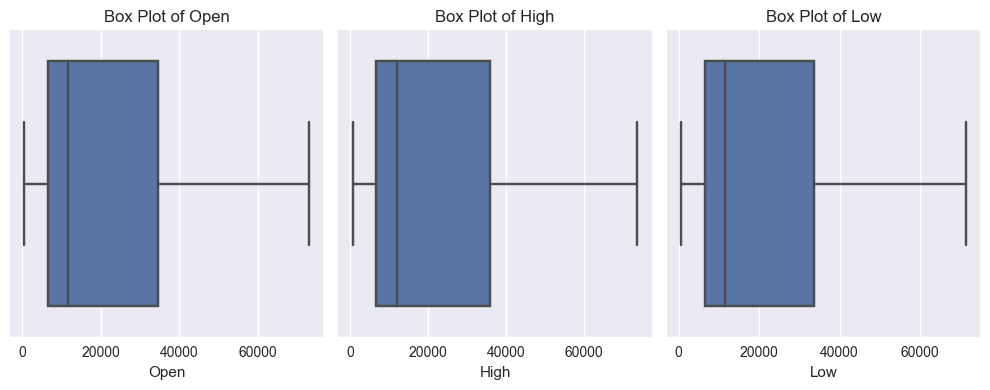

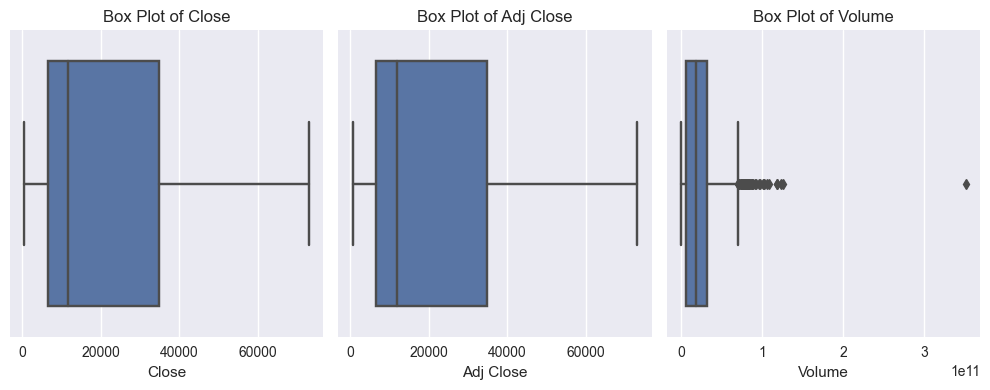

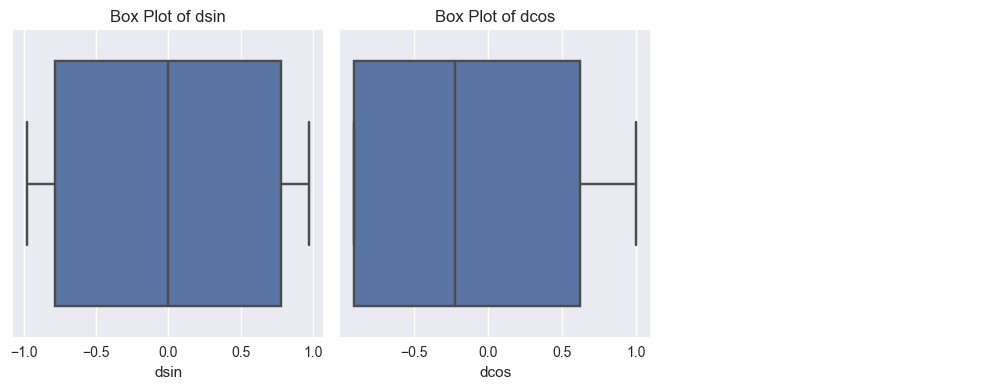

In [12]:
# Use df.columns to dynamically get all column names
columns = df.columns

# Plot 3 box plots per row
for i in range(0, len(columns), 3):
    fig, axes = plt.subplots(1, 3)
    for j, ax in enumerate(axes):
        if i + j < len(columns):
            sns.boxplot(x=df[columns[i + j]], ax=ax)
            ax.set_title(f'Box Plot of {columns[i + j]}')
        else:
            ax.axis('off')  # Hide the unused subplot
    plt.tight_layout()
    plt.show()

#### Scatterplots

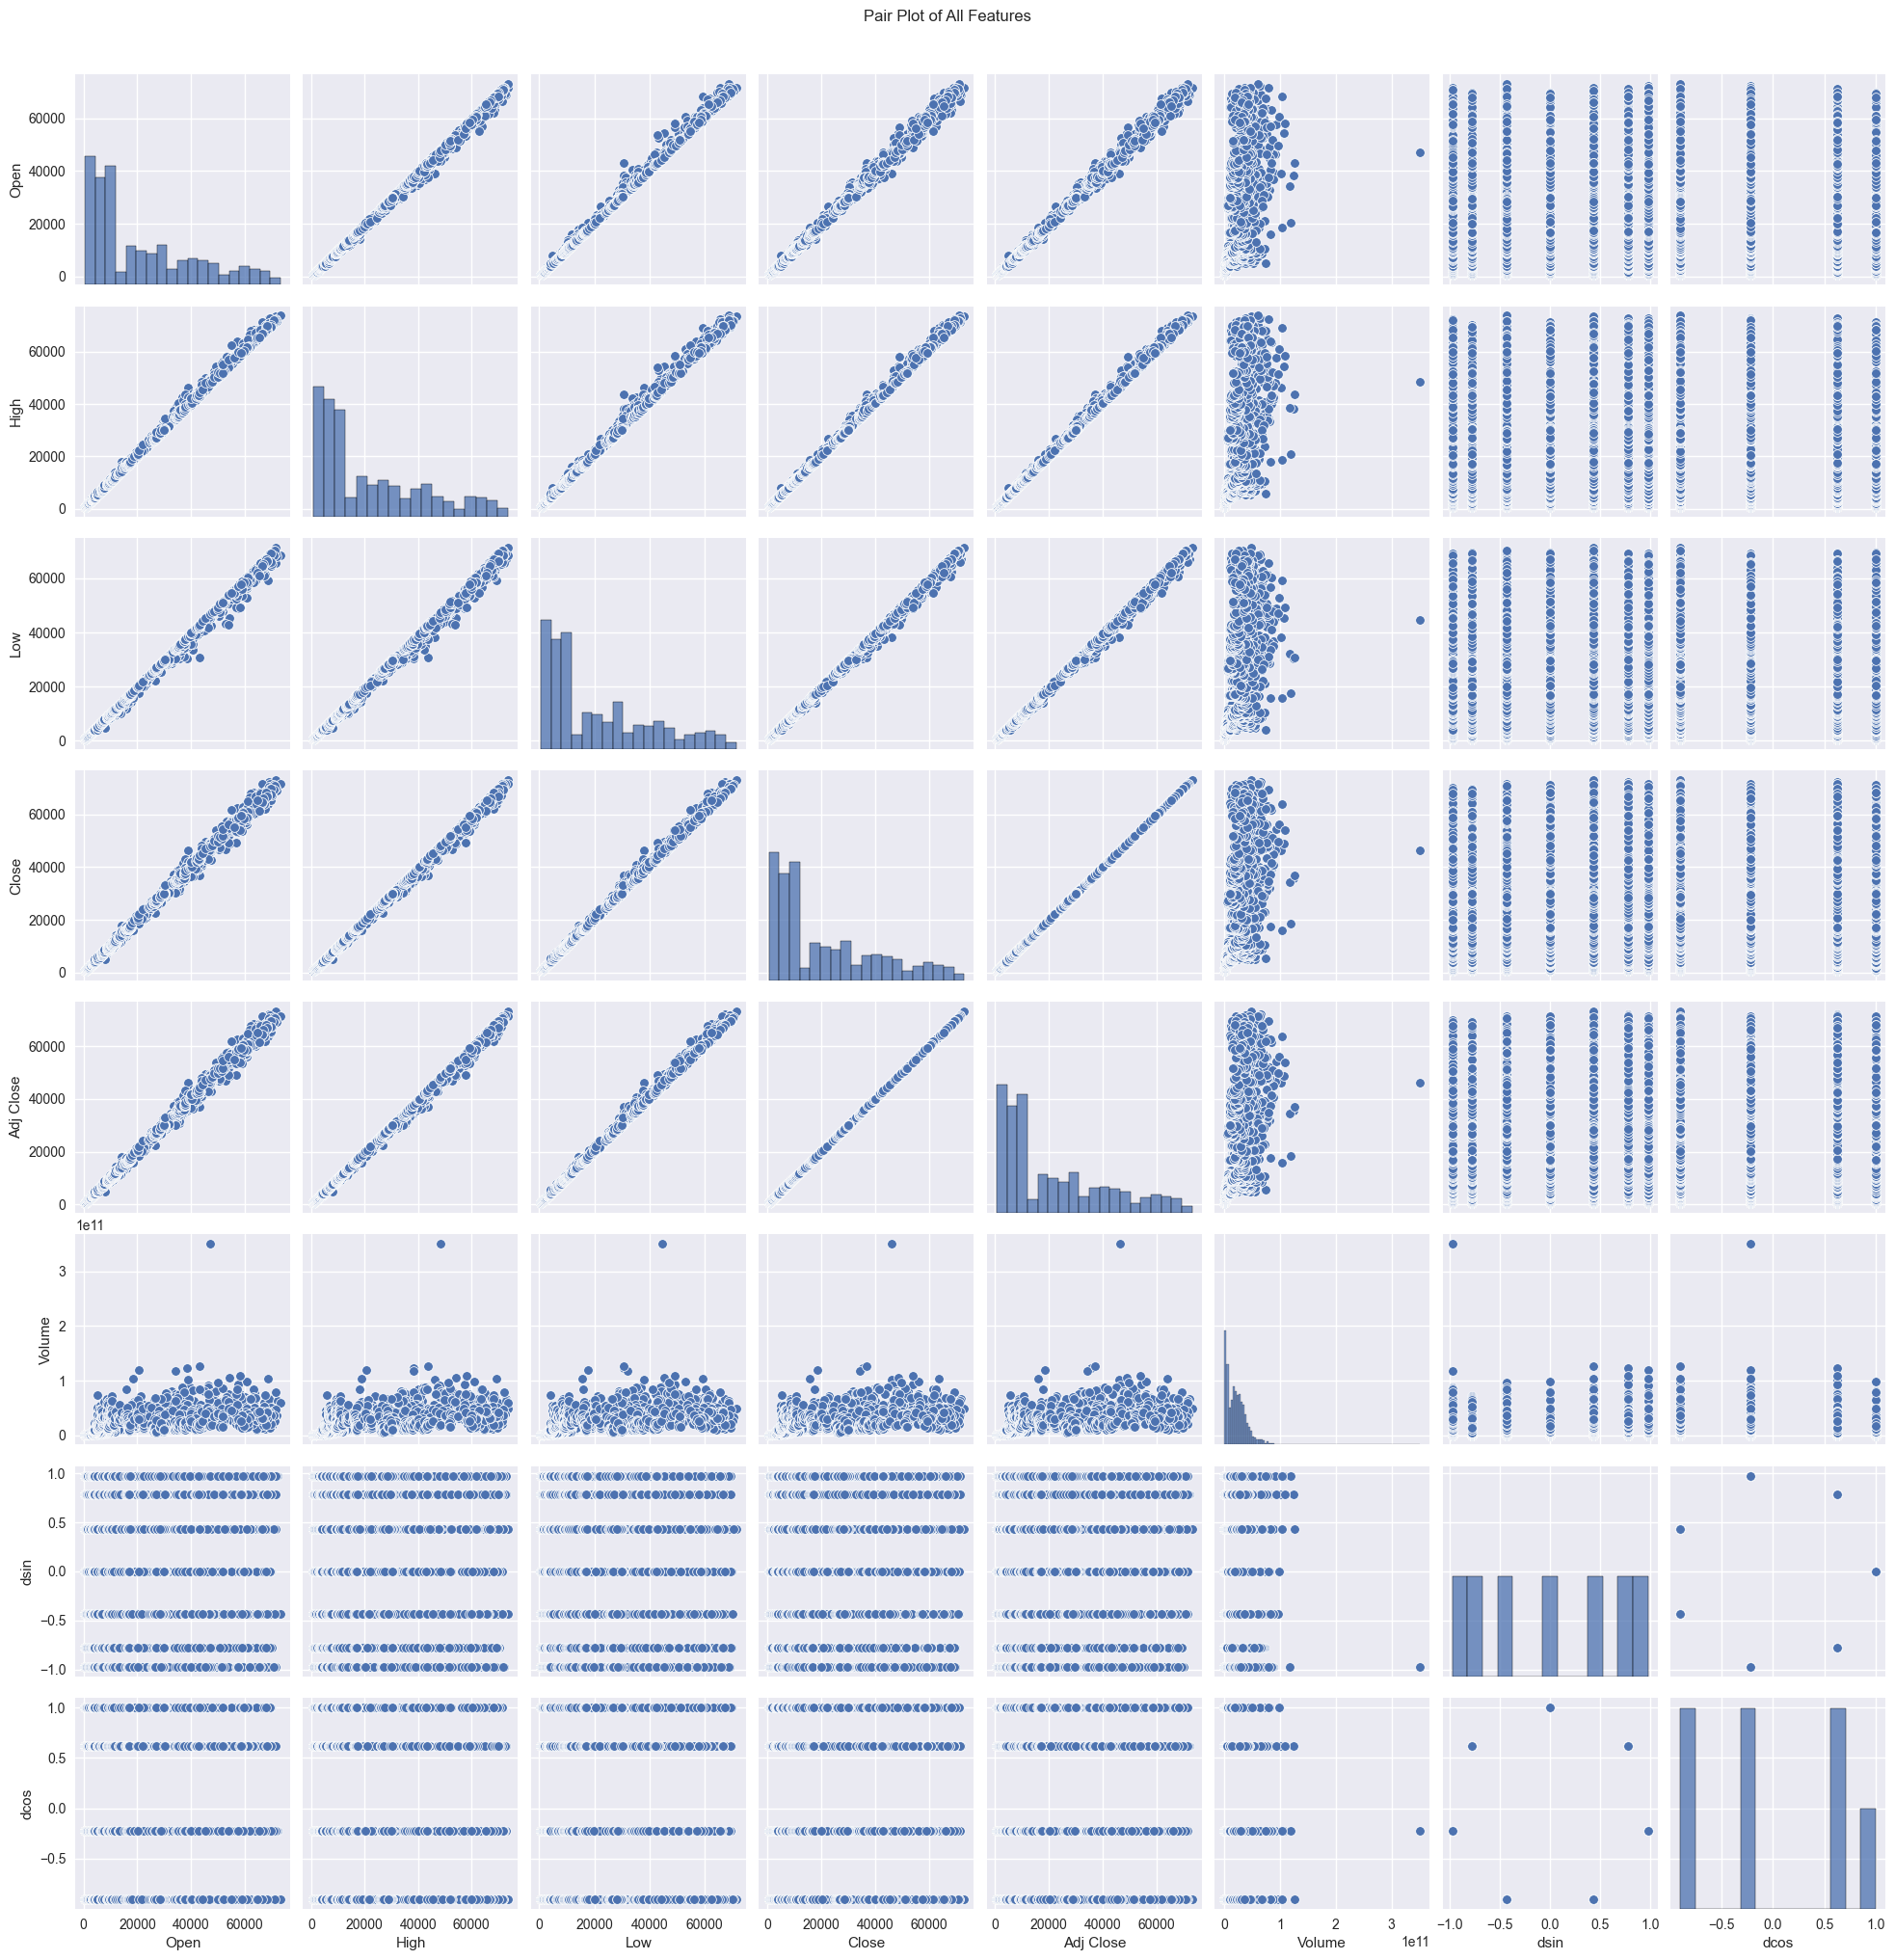

In [13]:
# Scatter plots
sns.pairplot(df)
plt.suptitle('Pair Plot of All Features',y=1.02)
plt.show()

### Feature Expansion

To enhance the predictive power of the model, we incorporated a variety of features designed to capture the temporal dependencies inherent in financial time series data.

#### Technical Indicators

In the initial phase, we leveraged a comprehensive set of technical indicators to assess market conditions and trends. Utilizing the `pandas-ta` library, which offers over 100 technical indicators, we were able to capture a wide array of market signals. These indicators included various types of moving averages, momentum oscillators like the Relative Strength Index (RSI), and volatility measures such as Bollinger Bands, among others. 

In [ ]:
# Add all factors
df.ta.strategy('All')
df = df.bfill(axis=1)

#### Lagged Features

We introduced lagged versions of return and applied binary transformations to potentially capture temporal dependencies and patterns in the data, utilizing lagged features alongside additional feature engineering techniques.

In [ ]:
# Calculate daily returns
df['Return'] = df['Close'].pct_change().fillna(0)

# Statistical summary
df['Return'].describe()

In [ ]:
# Compute lagged returns
cols = []
for lag in [1, 2, 3, 4, 5]:
    col = f'Return_{lag}'
    df[col] = df.Return.shift(lag)  
    cols.append(col)

# Drop NaN values
df.dropna(inplace=True)

# Binary transformation
cols_bin = []
for col in cols:
    col_bin = f'{col}_bin'
    df[col_bin] = np.digitize(df[col], bins=[0])
    cols_bin.append(col_bin)

# Add other features
df['o2c'] = df['Open'] - df['Close']
df['h2l'] = df['High'] - df['Low']

# Drop unnecessary columns
df.drop(['Return_1', 'Return_2', 'Return_3', 'Return_4', 'Return_5'], axis=1, inplace=True)
df

#### Label Definition

Label or the target variable is also known as the dependent variable. Here, the target variable is wether Bitcoin prices will close up or down on the next day.

Class Labeling: The target variable $\hat{y}_t$ is defined as:

$$
\hat{y}_t = 
\begin{cases} 
1 & \text{if } P_{t+1} > 0.995 \times P_t \\
0 & \text{otherwise} 
\end{cases}
$$

Where $P_t$ is the current day adjusted closing price, and $P_{t+1}$ is the next day adjusted closing price.

A specific threshold is set to categorize price movements. The threshold of 0.995 times the current day price is used to filter out very small, near-zero returns. By setting a specific percentage increase as the criterion for a signal, the model aims to avoid reacting to minor fluctuations, which are common in volatile markets like cryptocurrencies. This threshold helps in reducing noise in the prediction model, focusing on more substantial and potentially profitable price movements.

In [ ]:
# Set threshold
df['dir'] = np.where(df['Adj Close'].shift(-1)>0.995*df['Adj Close'],1,0)

# Specify target
y = df['dir'].values

# Pandas-ta converts all dtype to objects
y = y.astype(int) 
y

In [ ]:
# Define features
X = df.drop('dir', axis=1)
feature_names = X.columns
X

In [19]:
# Saving the dates from the DataFrame for future reference
dates = df.index

### Class Imbalance

Class imbalance is a common issue in machine learning, particularly in classification problems where the number of instances in each class is not evenly distributed. This can lead to biased models that perform well on the majority class but poorly on the minority class, as the model tends to predict the majority class more frequently due to its higher occurrence in the training data.

To mitigate this issue, several techniques can be applied, such as resampling the dataset, using different evaluation metrics, or adjusting class weights. In this work, we addressed class imbalance by computing class weights that are inversely proportional to the class frequencies. This approach ensures that the model pays equal attention to both classes, thus improving its ability to generalize. This way we can build a more robust and unbiased model.

In [20]:
# Function to compute class weights
def cwts(dfs):
    c0, c1 = np.bincount(dfs['dir'])
    w0 = (1 / c0) * (len(dfs) / 2)
    w1 = (1 / c1) * (len(dfs) / 2)
    return {0: w0, 1: w1}

In [ ]:
# Class frequency
c = np.bincount(y)
c

In [ ]:
# Check class weights
class_weight = cwts(df)
class_weight

In [ ]:
# With the calculated weights, both classes gain equal weight
class_weight[0] * c[0], class_weight[1] * c[1]

### Train - Test  Split

In [24]:
# Split into training and test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, shuffle=False)

# Split training into training and validation
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.25, shuffle=False) 

# Convert to arrays
Xtrain, Xval, Xtest, ytrain, yval, ytest = map(np.array, [Xtrain, Xval, Xtest, ytrain, yval, ytest])

### Feature Selection

The feature selection in this model leverages multiple methods, each adding a layer of sophistication to how features are selected and evaluated:

1. **Boruta Algorithm**:
   Boruta is an all-relevant feature selection method, particularly effective in distinguishing between relevant and irrelevant features by employing a statistical test. It operates by creating shadow features (random shuffles of real features) and iteratively compares the importance of actual features with these shadows as determined by a Random Forest classifier. The importance measure used is the Mean Decrease in Impurity (MDI) of the Random Forest, calculated as follows:

   $$
   \text{Importance}(X_i) = \sum_{t \in T : v(s_t) = X_i} p(t) \cdot \Delta i(s_t, t)
   $$

   Where:
   - $X_i$ is a feature.
   - $T$ represents all trees in the Random Forest.
   - $s_t$ is the split involving $X_i$ in tree $t$.
   - $p(t)$ is the proportion of samples reaching $s_t$.
   - $\Delta i(s_t, t)$ is the impurity decrease from the split $s_t$.

   The iterative process continues until all features are classified as significant or not, with a max iteration parameter `max_iter` controlling the number of runs.
#

2. **Correlation Analysis**:
    To address multicollinearity, we perform correlation analysis among the features. Highly correlated features are identified, and one feature from each pair is removed. The Pearson correlation coefficient is used, calculated as:

    $$ \rho_{X,Y} = \frac{\text{cov}(X,Y)}{\sigma_X \sigma_Y} $$

   Where:
   - $\text{cov}(X,Y)$ is the covariance of features $X$ and $Y$.
   - $\sigma_X$ and $\sigma_Y$ are the standard deviations of $X$ and $Y$ respectively.

 #  
3. **Mutual Information (MI)**:
   MI is used as a filter method to evaluate the dependency of each feature on the target variable. Unlike linear correlation measures, Mutual Information quantifies the amount of information obtained about one variable through another, capturing both linear and nonlinear relationships. It is particularly valuable in complex datasets where linear correlations may not adequately describe the interactions between features and the target. The Mutual Information between two variables $X$ and $Y$ is defined as:

   $$
   MI(X;Y) = \sum_{x \in X, y \in Y} p(x, y) \log \frac{p(x, y)}{p(x) p(y)}
   $$

   Where:
   - $p(x, y)$ is the joint probability distribution function of $X$ and $Y$.
   - $p(x)$ and $p(y)$ are the marginal probability distribution functions of $X$ and $Y$ respectively.
   #
4. **K-Means Clustering**
K-Means is employed for dimensionality reduction and to handle non-linearity by examining feature behavior across different clusters. The centroids found by K-Means can hint at natural groupings in data, which could potentially reveal patterns beneficial for prediction. The optimization goal of K-Means is to minimize the within-cluster sum of squares (WCSS), represented as:

$$ \text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2 $$

Where:
- $C_i$ is the set of points in cluster $i$.
- $\mu_i$ is the centroid of cluster $i$.
- $k$ is the number of clusters.

By combining these methods, the selection process becomes more comprehensive, leading to a more refined and effective feature set for training the deep learning model.


#### Borutapy

Boruta iteratively removes features that are deemed less important, and its process continues until they are either confirmed or rejected as significant. 

In [ ]:
# Define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, 
                                class_weight=cwts(df), 
                                random_state=42, 
                                max_depth=10)

# Train the model
forest.fit(Xtrain, ytrain)

In [ ]:
# Define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', perc=10, alpha=0.05, random_state=42, max_iter=100, verbose=2)

# Find all relevant features
feat_selector.fit(Xtrain, ytrain) 

# Call transform() on X to filter it down to selected features
Xtrain = feat_selector.transform(Xtrain)

In [ ]:
# Zip names, ranks, and decisions in a single iterable
feature_ranks = list(zip(feature_names, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

# Iterate through and print out the results
for feat in feature_ranks:
    print(f'Feature: {feat[0]:<30} Rank: {feat[1]:<5} Keep: {feat[2]}')

In [ ]:
# Filter the feature names based on Boruta selection
selected_feature_names = [name for name, selected in zip(feature_names, feat_selector.support_) if selected]

# Create a DataFrame with only the selected features
selected_features_df = df[selected_feature_names]
selected_features_df.columns

In [29]:
# Apply Boruta transformation to Xtest and Xval
Xtest = feat_selector.transform(np.array(Xtest))
Xval = feat_selector.transform(np.array(Xval))

#### Correlation Analysis

In [ ]:
# Function to identify correlated features
def correlated_features(df, threshold=0.9):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of the column
                col_corr.add(colname)
    return col_corr

# Identify correlated features in the selected features DataFrame
correlated = correlated_features(selected_features_df)
print(f"Correlated features to be removed: {correlated}")

# Ensure all datasets (Xtrain, Xtest, Xval) are aligned with selected feature names
Xtrain_df = pd.DataFrame(Xtrain, columns=selected_feature_names)
Xtest_df = pd.DataFrame(Xtest, columns=selected_feature_names)
Xval_df = pd.DataFrame(Xval, columns=selected_feature_names)

# Drop correlated features from Xtrain, Xtest, and Xval
Xtrain_df.drop(columns=correlated, inplace=True)
Xtest_df.drop(columns=correlated, inplace=True)
Xval_df.drop(columns=correlated, inplace=True)

# Convert back to NumPy arrays
Xtrain = Xtrain_df.values
Xtest = Xtest_df.values
Xval = Xval_df.values

# Print the new shapes of the datasets
print(f"Xtrain shape after dropping correlated features: {Xtrain.shape}")
print(f"Xtest shape after dropping correlated features: {Xtest.shape}")
print(f"Xval shape after dropping correlated features: {Xval.shape}")

#### Mutual Information

In [ ]:
# Ensure the updated list of feature names after removing correlated features
updated_feature_names = Xtrain_df.columns.tolist()

# Convert the numpy arrays to DataFrames with updated feature names
Xtrain_df = pd.DataFrame(Xtrain, columns=updated_feature_names)
Xval_df = pd.DataFrame(Xval, columns=updated_feature_names)
Xtest_df = pd.DataFrame(Xtest, columns=updated_feature_names)

# Calculate Mutual Information for each feature
mi = mutual_info_classif(Xtrain_df, ytrain)

# Create a DataFrame for Mutual Information
mi_data = pd.DataFrame({'feature': updated_feature_names, 'mutual_info': mi})

# Sort features by their mutual information
mi_data = mi_data.sort_values(by='mutual_info', ascending=False)

# Display the sorted mutual information
mi_data

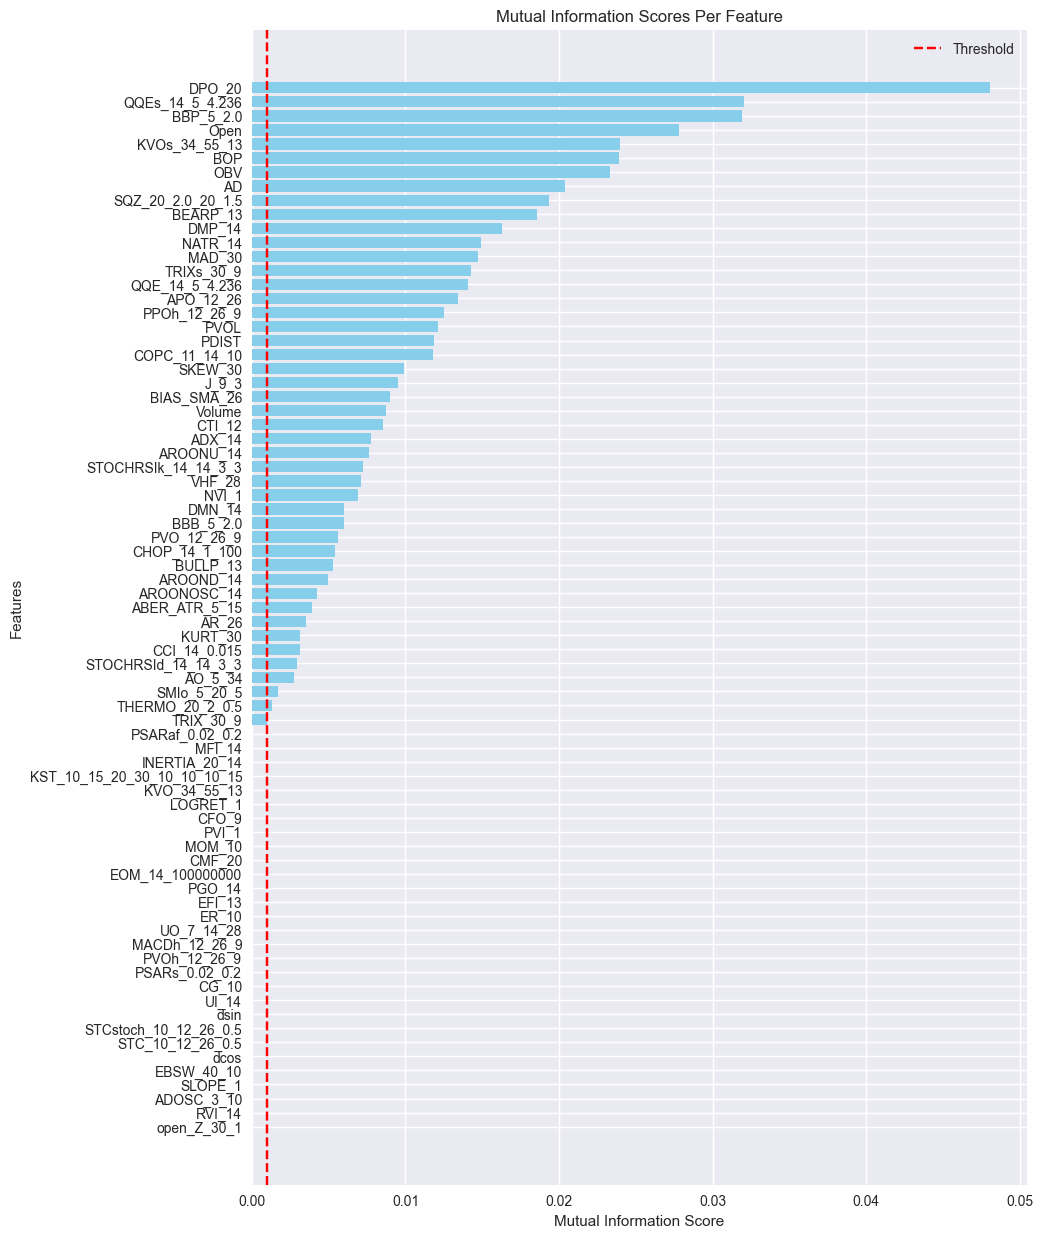

In [32]:
mi_data = mi_data.sort_values(by='mutual_info', ascending=True)

# Plot the graph
plt.figure(figsize=(10, 15))
plt.barh(mi_data['feature'], mi_data['mutual_info'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Mutual Information Scores Per Feature')

# Draw a line for the threshold
plt.axvline(x=0.001, color='red', linestyle='--', label='Threshold')
plt.legend()

plt.show()

In [33]:
# Define a threshold for mutual information
mi_threshold = 0.001  

# Identify features to drop based on mutual information threshold
features_to_drop_mi = mi_data[mi_data['mutual_info'] < mi_threshold]['feature'].tolist()

# Drop features from the training data based on mutual information
Xtrain_df.drop(columns=features_to_drop_mi, inplace=True)

# Drop Mutual Information filtered columns from validation and test sets
Xval_df.drop(columns=features_to_drop_mi, inplace=True)
Xtest_df.drop(columns=features_to_drop_mi, inplace=True)

# Convert back to NumPy arrays
Xtrain = Xtrain_df.values
Xtest = Xtest_df.values
Xval = Xval_df.values

# Print the new shapes of the datasets
print(f"Xtrain shape after dropping MI features: {Xtrain.shape}")
print(f"Xtest shape after dropping MI features: {Xtest.shape}")
print(f"Xval shape after dropping MI features: {Xval.shape}")

Xtrain shape after dropping MI features: (1736, 45)
Xtest shape after dropping MI features: (579, 45)
Xval shape after dropping MI features: (579, 45)


#### K-Means

In [34]:
# Define the number of clusters
num_clusters = 35

# Initialize KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)   

# Fit KMeans to the training data
kmeans.fit(Xtrain)

# Transform the datasets based on the cluster assignments
Xtrain = kmeans.transform(Xtrain)
Xtest = kmeans.transform(Xtest)
Xval = kmeans.transform(Xval)

# Print the new shapes of the datasets
print(f"Xtrain shape after KMeans transformation: {Xtrain.shape}")
print(f"Xtest shape after KMeans transformation: {Xtest.shape}")
print(f"Xval shape after KMeans transformation: {Xval.shape}")

Xtrain shape after KMeans transformation: (1736, 35)
Xtest shape after KMeans transformation: (579, 35)
Xval shape after KMeans transformation: (579, 35)


### Final EDA after Feature Selection

In [35]:
# Create a new DataFrame for the transformed Xtrain
df_Xtrain = pd.DataFrame(Xtrain, columns=[f'feature_{i}' for i in range(num_clusters)])

# Statistical summary
df_Xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_0,1736.0,3.947915e+14,9.503517e+14,6.821562e+10,2.282869e+13,5.103159e+13,2.375879e+14,1.623444e+16
feature_1,1736.0,2.909945e+15,7.583330e+14,3.785966e+11,2.995720e+15,3.180930e+15,3.242787e+15,1.300262e+16
feature_2,1736.0,1.585375e+16,9.560910e+14,0.000000e+00,1.599685e+16,1.618341e+16,1.624535e+16,1.626375e+16
feature_3,1736.0,1.634073e+15,4.627195e+14,2.928046e+11,1.570441e+15,1.746165e+15,1.801587e+15,1.444997e+16
feature_4,1736.0,4.518221e+14,8.500415e+14,7.304831e+11,1.402758e+14,2.654656e+14,2.965000e+14,1.596650e+16
feature_5,1736.0,3.852022e+15,8.658735e+14,8.642764e+11,3.975230e+15,4.160440e+15,4.222298e+15,1.202311e+16
feature_6,1736.0,2.171843e+15,5.850048e+14,7.194272e+12,2.184454e+15,2.366756e+15,2.427971e+15,1.381774e+16
feature_7,1736.0,9.561518e+14,5.695991e+14,3.451078e+12,7.768483e+14,9.406943e+14,9.764905e+14,1.528376e+16
feature_8,1736.0,4.723537e+15,8.874720e+14,6.023876e+13,4.854727e+15,5.039937e+15,5.101794e+15,1.114362e+16
feature_9,1736.0,3.285079e+15,8.222958e+14,1.927326e+12,3.393274e+15,3.578484e+15,3.640342e+15,1.260507e+16


In [ ]:
# Generate the Sweetviz report
report = sv.analyze(df_Xtrain)

# Save the report to an HTML file
report.show_html('df_Xtrain_sweetviz_report.html')

### Feature Scaling

Upon conducting Exploratory Data Analysis on the dataset, we observed significant variability and the presence of outliers in the feature distributions, as evidenced by high standard deviations and wide ranges in the summary statistics. Given these characteristics, the most appropriate transformation to standardize the data is the RobustScaler.

Unlike the StandardScaler, which is sensitive to outliers, and the MinMaxScaler, which scales data to a fixed range but can be distorted by outliers, the RobustScaler scales the data using the interquartile range (IQR). This method is particularly effective for datasets with outliers, as it focuses on the central 50% of the data, thereby minimizing the influence of extreme values and ensuring a more robust standardization. 

In [37]:
# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler on the training data and transform it
scaledtrain = scaler.fit_transform(Xtrain)

# Transform the test data
scaledtest = scaler.transform(Xtest)

# Transform the validation data
scaledval = scaler.transform(Xval)

### Sequence Data Generation

In `many-to-one` sequence problem, the input of the LSTM is always a 3D array and the time series data must be transformed into a structure of samples with input and output components before it can be used to fit a supervised learning model.

The Keras deep learning library provides the TimeseriesGenerator to automatically transform both univariate and multivariate time series data into samples, ready to train deep learning models.

In [38]:
# Sequence length
seqlen = 15

# Number of features
numfeat = Xtrain.shape[1]

In [39]:
# Create the generator for training data
g_train = TimeseriesGenerator(Xtrain, ytrain, length=seqlen, batch_size=32)  

# Create the generator for test data
g_test = TimeseriesGenerator(Xtest, ytest, length=seqlen, batch_size=32)

# Create the generator for validation data
g_val = TimeseriesGenerator(Xval, yval, length=seqlen, batch_size=32)  

In [ ]:
# Verify length
len(g_train), len(g_test), len(g_val)

In [ ]:
# Check feature set
g_train[0][0]

In [ ]:
# Check target 
g_train[0][1] 

In [ ]:
# Verify batch size
for i in range(len(g_train)):
    a, b = g_train[i]
    print(a.shape, b.shape)

### Build Neural Networks

In this project, we experimented with five different model architectures to predict the target variable. The models include variations in LSTM configurations, the use of GRU, and the incorporation of convolutional layers. Here are the detailed descriptions of each model:

#### Model 1: 2-Layer LSTM

This model consists of 2 LSTM layers interspersed with a dropout layer. The first LSTM layer returns sequences, and the second LSTM layer returns the final output.

The core idea behind LSTMs is the cell state, which acts like a conveyor belt transporting information down the sequence chain with minimal changes. The information flow is regulated by structures called gates:

1. **Forget Gate**: Decides what information should be discarded from the cell state. It looks at the previous hidden state $h_{t-1}$ and the current input $x_t$, and outputs a number between 0 and 1 for each number in the cell state $C_{t-1}$. The forget gate operation is formulated as:
   $$
   f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
   $$
   where $\sigma$ is the sigmoid function, $W_f$ is the weight matrix for the forget gate, and $b_f$ is the bias.

2. **Input Gate**: Decides which new information to store in the cell state. It involves a sigmoid layer that decides which values to update, and a tanh layer that creates a vector of new candidate values, $\tilde{C}_t$, that could be added to the state:
   $$
   i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
   $$
   $$
   \tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
   $$

3. **Output Gate**: Determines the next hidden state, which contains information about the previous input. The hidden state can be used in predictions:
   $$
   o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
   $$
   $$
   h_t = o_t * \tanh(C_t)
   $$
#
#### Model 2: 3-Layer LSTM

This model extends Model 1 by adding an additional LSTM layer and another dropout layer. The extra LSTM layer is used to capture more complex temporal patterns in the data.
#
#### Model 3: 4-Layer LSTM 

This model builds on Model 2 by using ELU activation functions for all LSTM layers and adding another LSTM and dropout layer. The ELU (Exponential Linear Unit) activation function is defined as:
  $$
  \text{ELU}(x) = \begin{cases} 
  x & \text{if } x \geq 0 \\
  \alpha(e^x - 1) & \text{if } x < 0 
  \end{cases}
  $$
  where $\alpha$ is a hyperparameter.

- ELU helps to mitigate the vanishing gradient problem, which can lead to better learning in deeper networks by providing non-zero gradients for negative values.

#### Model 4: 3-Layer GRU 

This model replaces LSTM layers with GRU (Gated Recurrent Unit) layers. GRUs simplify the LSTM architecture by combining the forget and input gates into a single update gate. The GRU cell can be described by the following equations:
  $$
  \begin{align*}
  z_t &= \sigma(W_z \cdot [h_{t-1}, x_t] + b_z) \\
  r_t &= \sigma(W_r \cdot [h_{t-1}, x_t] + b_r) \\
  \tilde{h}_t &= \tanh(W_h \cdot [r_t \cdot h_{t-1}, x_t] + b_h) \\
  h_t &= (1 - z_t) \cdot h_{t-1} + z_t \cdot \tilde{h}_t
  \end{align*}
  $$
  where $z_t$ is the update gate, $r_t$ is the reset gate, and $h_t$ is the hidden state.

- **GRU Layer**: GRU layers are used to capture temporal dependencies in the data, simplifying the architecture and often training faster than LSTMs while providing similar performance.

#### Model 5: Convolutional Layer Followed by LSTM

This model incorporates a 1D convolutional layer before the LSTM layer. The convolutional layer helps in extracting local features from the input time series data. The combination of CNN and LSTM allows the model to leverage both spatial (local feature) and temporal (sequence dependency) information. 

##### Convolutional Layer (Conv1D)
The Conv1D layer is used to extract local patterns and features from the input time series data. The operation can be described as:
  $$
  y(t) = (x * w)(t) = \sum_{a} x(a) \cdot w(t - a)
  $$
  where $*$ denotes the convolution operation, $x$ is the input signal, and $w$ is the filter (kernel).

Key components of the Conv1D layer:
- **Filters/Kernels**: Small matrices that slide over the input data to detect patterns.
- **Stride**: The number of steps the filter moves over the input data. 
- **Padding**: Controls the handling of borders.

The convolution operation is followed by a non-linear activation function, typically ReLU (Rectified Linear Unit):
  $$
  \text{ReLU}(z) = \max(0, z)
  $$

##### LSTM Layer
After the Conv1D layer, the extracted features are fed into an LSTM to capture temporal dependencies. 

Potential advantages of combining Conv1D and LSTM:
1. **Feature Extraction**: The Conv1D layer extracts local features and patterns from raw input data.
2. **Sequence Learning**: The LSTM layer captures temporal dependencies and patterns in the sequence of extracted features.
#
#### Model Compilation

- **Optimizer**: The Adam optimizer is used for training, which is an algorithm for first-order gradient-based optimization of stochastic objective functions. It combines the advantages of two other extensions of stochastic gradient descent: Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp).
  $$
  \text{Adam}(g, m, v, t) = \frac{\alpha \hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
  $$
  where $g$ is the gradient, $m$ is the first moment (mean of the gradients), $v$ is the second moment (uncentered variance of the gradients), $\alpha$ is the learning rate, $\epsilon$ is a small constant to prevent division by zero, $\hat{m}_t$ and $\hat{v}_t$ are bias-corrected first and second moment estimates at time step $t$.

- **Loss Function**: The Binary Crossentropy loss is used for binary classification tasks. It is defined as:
  $$
  L = -\frac{1}{N} \sum_{i=1}^N [y_i \log(p_i) + (1 - y_i) \log(1 - p_i)]
  $$
  where $N$ is the number of samples, $y_i$ is the binary true label, and $p_i$ is the predicted probability of the positive class.

This setup aims to optimize the binary classification problem by adjusting the model weights based on backpropagation of the error, minimizing the loss function during training.

#### MODEL 1: 2-Layer LSTM

In [44]:
def create_model_1(lookback, features, hu):
    tf.keras.backend.clear_session()

    model = Sequential()
    model.add(LSTM(units=hu*2, input_shape=(lookback, features), activation='relu', return_sequences=True, name='LSTM1'))
    model.add(Dropout(0.4, name='Dropout1'))
    model.add(LSTM(units=hu, activation='elu', return_sequences=False, name='LSTM2'))
    model.add(Dense(units=1, activation='sigmoid', name='Output'))
    
     # Specify optimizer separately (preferred method)
    opt = Adam(learning_rate=0.001, epsilon=1e-08)
    
    # Model compilation 
    model.compile(optimizer=opt, 
                  loss=BinaryCrossentropy(), 
                  metrics=['accuracy', Precision(), Recall(), AUC()])
    return model

#### MODEL 2: 3-Layer LSTM

In [45]:
def create_model_2(lookback, features, hu):
    tf.keras.backend.clear_session()

    model = Sequential()
    model.add(LSTM(units=hu*2, input_shape=(lookback, features), activation='relu', return_sequences=True, name='LSTM1'))
    model.add(Dropout(0.4, name='Dropout1'))
    model.add(LSTM(units=hu, activation='relu', return_sequences=True, name='LSTM2'))
    model.add(Dropout(0.4, name='Dropout2'))
    model.add(LSTM(units=hu, activation='relu', return_sequences=False, name='LSTM3'))
    model.add(Dense(units=1, activation='sigmoid', name='Output'))
    
    opt = Adam(learning_rate=0.001, epsilon=1e-08)
    
    model.compile(optimizer=opt, 
                  loss=BinaryCrossentropy(), 
                  metrics=['accuracy', Precision(), Recall(), AUC()])
    return model


#### MODEL 3: 4-Layer LSTM

In [46]:
def create_model_3(lookback, features, hu):
    tf.keras.backend.clear_session()

    model = Sequential()
    model.add(LSTM(units=hu*2, input_shape=(lookback, features), activation='elu', return_sequences=True, name='LSTM1'))
    model.add(Dropout(0.4, name='Dropout1'))
    model.add(LSTM(units=hu, activation='elu', return_sequences=True, name='LSTM2'))
    model.add(Dropout(0.4, name='Dropout2'))
    model.add(LSTM(units=hu, activation='elu', return_sequences=True, name='LSTM3'))
    model.add(Dropout(0.4, name='Dropout3'))
    model.add(LSTM(units=hu, activation='elu', return_sequences=False, name='LSTM4'))
    model.add(Dense(units=1, activation='sigmoid', name='Output'))
    
    opt = Adam(learning_rate=0.001, epsilon=1e-08)
    
    model.compile(optimizer=opt, 
                  loss=BinaryCrossentropy(), 
                  metrics=['accuracy', Precision(), Recall(), AUC()])
    return model

#### MODEL 4: GRU

In [47]:
def create_model_4(lookback, features, hu):
    tf.keras.backend.clear_session()

    model = Sequential()
    model.add(GRU(units=hu*2, input_shape=(lookback, features), activation='relu', return_sequences=True, name='GRU1'))
    model.add(Dropout(0.4, name='Dropout1'))
    model.add(GRU(units=hu, activation='relu', return_sequences=True, name='GRU2'))
    model.add(Dropout(0.4, name='Dropout2'))
    model.add(GRU(units=hu, activation='relu', return_sequences=False, name='GRU3'))
    model.add(Dense(units=1, activation='sigmoid', name='Output'))
    
    opt = Adam(learning_rate=0.001, epsilon=1e-08)
    
    model.compile(optimizer=opt, 
                  loss=BinaryCrossentropy(), 
                  metrics=['accuracy', Precision(), Recall(), AUC()])
    return model

#### MODEL 5: CNN + LSTM

In [48]:
def create_model_5(lookback, features, hu):
    tf.keras.backend.clear_session()

    model = Sequential()
    model.add(Conv1D(filters=hu, kernel_size=3, activation='relu', input_shape=(lookback, features), name='Conv1D1'))
    model.add(MaxPooling1D(pool_size=2, name='MaxPooling1D1'))
    model.add(LSTM(units=hu, activation='relu', name='LSTM1'))
    model.add(Dropout(0.4, name='Dropout1'))
    model.add(Dense(units=1, activation='sigmoid', name='Output'))
    
    opt = Adam(learning_rate=0.001, epsilon=1e-08)
    
    model.compile(optimizer=opt, 
                  loss=BinaryCrossentropy(), 
                  metrics=['accuracy', Precision(), Recall(), AUC()])
    return model

### Train models

In [ ]:
# Define the models 
models = [
    create_model_1(lookback=seqlen, features=numfeat, hu=10),
    create_model_2(lookback=seqlen, features=numfeat, hu=10),
    create_model_3(lookback=seqlen, features=numfeat, hu=10),
    create_model_4(lookback=seqlen, features=numfeat, hu=10),
    create_model_5(lookback=seqlen, features=numfeat, hu=10)
]

# Base directory for all results
results_path = Path('results')

# Ensure the base results directory exists
if not results_path.exists():
    results_path.mkdir(parents=True)

# Create file paths directly in the results folder
model_files = [results_path / f'model_{i+1}.h5' for i in range(5)]

# Create log directories directly in the results folder
logdirs = [os.path.join("./tensorboard/logs", f'logs_{dt.datetime.now().strftime("%Y%m%d-%H%M%S")}_model_{i+1}') for i in range(5)]

# Training loop
for i, model in enumerate(models):
    model_path = model_files[i].as_posix()  # files saved in results folder
    logdir = logdirs[i]
    
    callbacks = [
        EarlyStopping(patience=10, monitor='loss', mode='min', verbose=1, restore_best_weights=True),
        ModelCheckpoint(filepath=model_path, verbose=1, monitor='loss', save_best_only=True),
        TensorBoard(log_dir=logdir, histogram_freq=1)
    ]
    
    # Fit model
    print(f'Training Model {i+1}...')
    model.fit(
        g_train,
        epochs=500,
        verbose=1,
        callbacks=callbacks,
        shuffle=False,
        class_weight=class_weight,
        validation_data=g_val
    )

### Calculate Metrics

To evaluate the performance of the model, various metrics are calculated:

1. **Training and Test Accuracy**:

   - **Definition**: Accuracy is the proportion of true results (both true positives and true negatives) among the total number of cases examined.
   
     $$
     \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
     $$
   - **Interpretation**: While accuracy provides a quick measure of the model performance, it can be misleading, especially in datasets with class imbalance.
    #
2. **Confusion Matrix**:

   - **Components**: The confusion matrix is a table that describes the performance of a classification model on a set of test data for which the true values are known. It includes:

     - True Positives (TP): Correctly predicted positive observations.
     - True Negatives (TN): Correctly predicted negative observations.
     - False Positives (FP): Incorrectly predicted as positive.
     - False Negatives (FN): Incorrectly predicted as negative.
    
    
      This matrix helps in understanding the model performance across different classes, highlighting the errors in prediction.
#
3. **Classification Report**:

   - **Metrics**:

     - **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
       $$
       \text{Precision} = \frac{TP}{TP + FP}
       $$
     - **Recall (Sensitivity)**: The ratio of correctly predicted positive observations to all observations in actual class.
       $$
       \text{Recall} = \frac{TP}{TP + FN}
       $$
     - **F1-Score**: The weighted average of Precision and Recall.
       $$
       F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
       $$
      These metrics provide a more detailed understanding of the model performance.
#
4. **ROC Curve and AUC Score**:

   - **ROC Curve**: A graphical representation that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

     - **True Positive Rate (TPR)**:
       $$
       TPR = \frac{TP}{TP + FN}
       $$
     - **False Positive Rate (FPR)**:
       $$
       FPR = \frac{FP}{FP + TN}
       $$
   - **AUC Score**: The area under the ROC curve. It provides an aggregate measure of performance across all possible classification thresholds.
   
     - **Interpretation**: A higher AUC indicates better model performance, with 1 being perfect prediction and 0.5 denoting no discriminative ability.


In [53]:
# Initialize lists to store accuracies
train_accuracies = []
test_accuracies = []

# Loop through each model to get predictions and accuracies
for i, model in enumerate(models):
    # For training accuracy
    ytrain_pred = model.predict(g_train)
    ytrain_pred = np.where(ytrain_pred > 0.5, 1, 0)  # Convert probabilities to class labels
    ytrain_true = ytrain[seqlen:]  # Adjust ytrain to match the length of ytrain_pred
    acc_train = accuracy_score(ytrain_true, ytrain_pred)
    train_accuracies.append(acc_train)
    
    # For test accuracy
    ytest_pred = np.where(model.predict(g_test, verbose=False) > 0.5, 1, 0)  # Convert probabilities to class labels
    ytest_true = ytest[seqlen:]  # Adjust ytest to match the length of ytest_pred
    acc_test = accuracy_score(ytest_true, ytest_pred)
    test_accuracies.append(acc_test)
    
    # Print accuracies
    print(f'Model {i+1} - Train Accuracy: {acc_train:.4f}, Test Accuracy: {acc_test:.4f}')

Model 1 - Train Accuracy: 0.3579, Test Accuracy: 0.4113
Model 2 - Train Accuracy: 0.6450, Test Accuracy: 0.6507
Model 3 - Train Accuracy: 0.6409, Test Accuracy: 0.6312
Model 4 - Train Accuracy: 0.3550, Test Accuracy: 0.3493
Model 5 - Train Accuracy: 0.6450, Test Accuracy: 0.6507


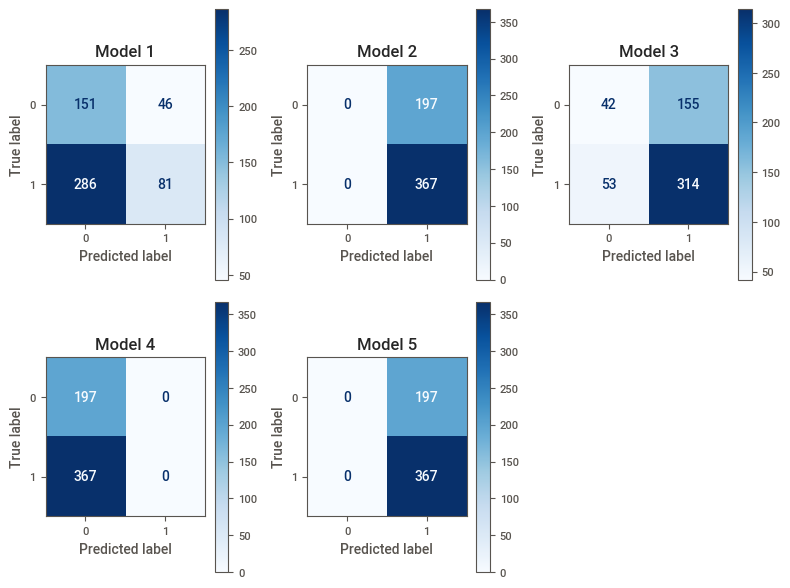

In [54]:
# Define the number of models
num_models = 5

# Loop through each model to get predictions and display confusion matrices
fig, axes = plt.subplots(nrows=(num_models + 2) // 3, ncols=3,figsize=(8, 6))  
axes = axes.flatten()
axes = axes.flatten()

for i, model in enumerate(models):
    # For test accuracy
    ytest_pred = np.where(model.predict(g_test, verbose=0) > 0.5, 1, 0).flatten()  # Convert probabilities to class labels and flatten
    ytest_true = ytest[seqlen:]  # Adjust ytest to match the length of ytest_pred
    
    # Create confusion matrix
    cm = confusion_matrix(ytest_true, ytest_pred)
    
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues, ax=axes[i], values_format='d')
    axes[i].set_title(f'Model {i+1}')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j]) 
plt.tight_layout()
plt.show()

In [55]:
# Loop through each model to get predictions and display classification reports
for i, model in enumerate(models):
    # For test accuracy
    ytest_pred = np.where(model.predict(g_test, verbose=False) > 0.5, 1, 0).flatten()  # Convert probabilities to class labels and flatten
    ytest_true = ytest[seqlen:]  # Adjust ytest to match the length of ytest_pred
    
    # Generate classification report
    report = classification_report(ytest_true, ytest_pred, target_names=['Class 0', 'Class 1'])
    
    # Print classification report
    print(f'Classification Report for Model {i+1}:\n{report}\n')

Classification Report for Model 1:
              precision    recall  f1-score   support

     Class 0       0.35      0.77      0.48       197
     Class 1       0.64      0.22      0.33       367

    accuracy                           0.41       564
   macro avg       0.49      0.49      0.40       564
weighted avg       0.54      0.41      0.38       564


Classification Report for Model 2:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       197
     Class 1       0.65      1.00      0.79       367

    accuracy                           0.65       564
   macro avg       0.33      0.50      0.39       564
weighted avg       0.42      0.65      0.51       564


Classification Report for Model 3:
              precision    recall  f1-score   support

     Class 0       0.44      0.21      0.29       197
     Class 1       0.67      0.86      0.75       367

    accuracy                           0.63       564
   macro avg       0.

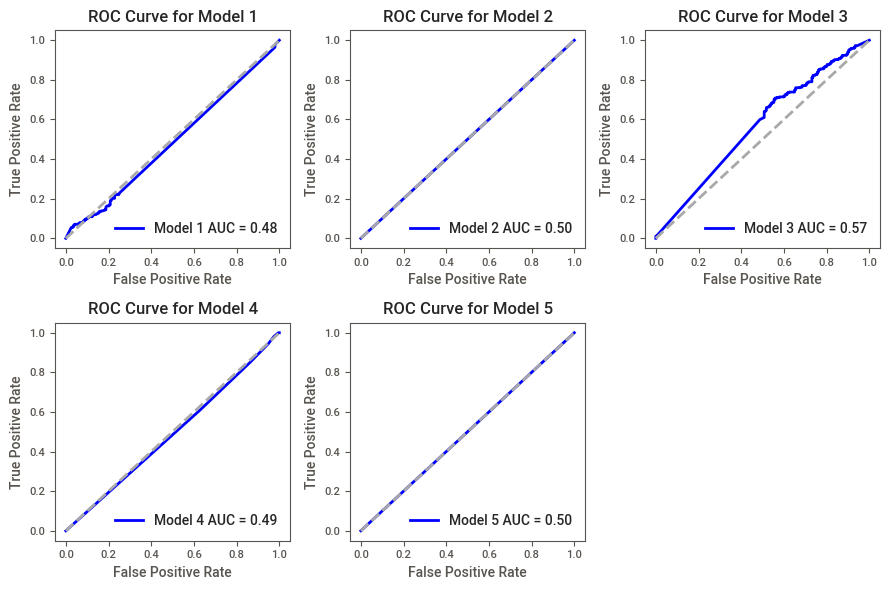

In [56]:
# Define the number of models
num_models = 5

# Create subplots: 3 plots per row, and increase the figure size for larger plots
fig, axes = plt.subplots(nrows=(num_models + 2) // 3, ncols=3,figsize=(9, 6))  
axes = axes.flatten()
axes = axes.flatten()

# Loop through each model to get predictions and plot ROC curves
for i, model in enumerate(models):
    # Generate probability predictions
    y_proba = model.predict(g_test).flatten()
    ytest_true = ytest[seqlen:]  # Adjust ytest to match the length of y_proba
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(ytest_true, y_proba)
    
    # Calculate AUC
    roc_auc = roc_auc_score(ytest_true, y_proba)
    
    # Plot the ROC curve
    axes[i].plot(fpr, tpr, color='blue', lw=2, label=f'Model {i+1} AUC = {roc_auc:.2f}')
    axes[i].plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'ROC Curve for Model {i+1}')
    axes[i].legend(loc="lower right")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Model Performance Comparison

In [57]:
# Initialize lists to store accuracies and other metrics
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []
aucs = []
true_positives = []
false_positives = []
true_negatives = []
false_negatives = []

# Loop through each model to get predictions and accuracies
for i, model in enumerate(models):
    # For training accuracy
    ytrain_pred = model.predict(g_train)
    ytrain_pred = np.where(ytrain_pred > 0.5, 1, 0)  # Convert probabilities to class labels
    ytrain_true = ytrain[seqlen:]  # Adjust ytrain to match the length of ytrain_pred
    acc_train = accuracy_score(ytrain_true, ytrain_pred)
    train_accuracies.append(acc_train)
    
    # For test accuracy
    ytest_pred = np.where(model.predict(g_test, verbose=False) > 0.5, 1, 0)  # Convert probabilities to class labels
    ytest_true = ytest[seqlen:]  # Adjust ytest to match the length of ytest_pred
    acc_test = accuracy_score(ytest_true, ytest_pred)
    test_accuracies.append(acc_test)
    
    # Compute precision, recall, f1-score
    precision, recall, f1, _ = precision_recall_fscore_support(ytest_true, ytest_pred, average='binary')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Compute AUC
    y_proba = model.predict(g_test).flatten()
    roc_auc = roc_auc_score(ytest_true, y_proba)
    aucs.append(roc_auc)
    
    # Compute confusion matrix
    cm = confusion_matrix(ytest_true, ytest_pred)
    tn, fp, fn, tp = cm.ravel()
    true_negatives.append(tn)
    false_positives.append(fp)
    false_negatives.append(fn)
    true_positives.append(tp)
    
# Create a dictionary with the results
results_dict = {
    'Model': [f'Model {i+1}' for i in range(len(train_accuracies))],
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores,
    'AUC': aucs,
    'True Positives': true_positives,
    'False Positives': false_positives,
    'True Negatives': true_negatives,
    'False Negatives': false_negatives
}

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results_dict)

In [58]:
results_df.round(4).T

,0,1,2,3,4
Model,Model 1,Model 2,Model 3,Model 4,Model 5
Train Accuracy,0.3579,0.645,0.6409,0.355,0.645
Test Accuracy,0.4113,0.6507,0.6312,0.3493,0.6507
Precision,0.6378,0.6507,0.6695,0.0,0.6507
Recall,0.2207,1.0,0.8556,0.0,1.0
F1-Score,0.3279,0.7884,0.7512,0.0,0.7884
AUC,0.4844,0.5,0.569,0.4897,0.5
True Positives,81,367,314,0,367
False Positives,46,197,155,0,197
True Negatives,151,0,42,197,0


By comparing the results, Model 3 was selected for its balanced performance across key metrics, particularly its strong recall and relatively high precision. While Model 2 and Model 5 achieved perfect recall, Model 3 provided a better trade-off by not only achieving high recall (0.8556) but also maintaining a reasonable precision (0.6695). This balance ensures that Model 3 makes accurate predictions while effectively managing false positives and false negatives.

Model 3 higher F1-score (0.7512) compared to Model 1 and its relatively improved AUC (0.569) indicate that it generalizes better to new data, particularly in handling class imbalance. While Model 2 achieved higher recall, Model 3 offers more reliable, well-rounded predictions for the binary classification task by balancing precision and recall, making it a strong choice for the problem at hand.

### Load Best Model

In [59]:
# Define the specific results path for model 2
results = Path('results')

# Define the model path within this directory
model_path = results / 'model_3.h5'

# Load the model from the specified path
base_model = load_model(model_path)
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM1 (LSTM)                 (None, 15, 20)            4480      
_________________________________________________________________
Dropout1 (Dropout)           (None, 15, 20)            0         
_________________________________________________________________
LSTM2 (LSTM)                 (None, 15, 10)            1240      
_________________________________________________________________
Dropout2 (Dropout)           (None, 15, 10)            0         
_________________________________________________________________
LSTM3 (LSTM)                 (None, 15, 10)            840       
_________________________________________________________________
Dropout3 (Dropout)           (None, 15, 10)            0         
_________________________________________________________________
LSTM4 (LSTM)                 (None, 10)                8

### Hyperparameter Optimization

After selecting the best model architecture, **Optuna** is used for hyperparameter optimization, with **maximizing balanced accuracy** as the objective function.

**Optuna** is a framework designed for efficient hyperparameter search. It employs various algorithms to explore the hyperparameter space, with the **Tree-structured Parzen Estimator (TPE)** being the default and widely used method. TPE is a specific instance of **Bayesian optimization**, which focuses on finding the optimal hyperparameters by balancing exploration and exploitation during the search process.

#### Bayesian Optimization

Bayesian optimization is a sequential method for optimizing expensive, black-box functions. The core idea is to construct a probabilistic model of the objective function, often referred to as a **surrogate model**, which predicts the performance of hyperparameters. Based on this model, new hyperparameter sets are selected that are expected to yield better results.

The general process of Bayesian optimization involves:

1. **Surrogate Model**: The objective function $f(x)$, where $x$ represents the hyperparameters, is approximated by a surrogate model. Gaussian Processes are often used for this, though **TPE** takes a different approach.
   
2. **Acquisition Function**: The surrogate model is used to construct an acquisition function, such as Expected Improvement (EI), which helps select the next hyperparameters to test. The acquisition function typically balances exploration (testing new, uncertain regions) and exploitation (focusing on promising regions).
   $$
   \text{EI}(x) = \mathbb{E}[\max(0, f(x_{\text{best}}) - f(x))]
   $$
   where $f(x_{\text{best}})$ is the best value observed so far.

3. **Optimization**: The acquisition function is optimized to select the next set of hyperparameters that should be evaluated based on the surrogate model's predictions.

#### Tree-structured Parzen Estimator (TPE)

In TPE, rather than modeling the objective function $f(x)$ directly, it models two probability densities:
- **$l(x)$**: The probability density of hyperparameters associated with good objective function values (higher balanced accuracy).
- **$g(x)$**: The probability density of hyperparameters associated with worse objective function values (lower balanced accuracy).

TPE selects hyperparameters by maximizing the ratio of these two densities, effectively favoring regions of the hyperparameter space that are more likely to yield good results:
$$
\frac{l(x)}{g(x)}
$$

This allows TPE to efficiently explore the hyperparameter space by focusing on areas that are statistically more likely to improve the objective function.

#### Objective Function

The objective function for this optimization is **balanced accuracy**, which gives equal importance to the true positive rate (sensitivity) and true negative rate (specificity). It is particularly useful for handling class imbalance. Balanced accuracy is calculated as:
$$
\text{Balanced Accuracy} = \frac{1}{2} \left( \frac{TP}{TP + FN} + \frac{TN}{TN + FP} \right)
$$
Where:
- $TP$ is the number of true positives,
- $FN$ is the number of false negatives,
- $TN$ is the number of true negatives,
- $FP$ is the number of false positives.

This metric ensures that both classes are treated fairly, which is especially important in imbalanced datasets, where standard accuracy might be misleading.

#### Optimization Process 

The optimization process follows these steps:

1. **Sampling**: Optuna samples a set of hyperparameters $x$ from the predefined search space.
2. **Evaluation**: The model is trained with these hyperparameters, and the validation balanced accuracy is calculated.
3. **Update**: Based on the results of this trial, Optuna updates the distributions $l(x)$ and $g(x)$.
4. **Selection**: Optuna selects the next set of hyperparameters to test, focusing on the most promising regions of the hyperparameter space by maximizing the ratio $\frac{l(x)}{g(x)}$.
5. **Iteration**: This process is repeated iteratively until the stopping criterion is met (e.g., a maximum number of trials or a time limit).

This iterative process aims to explore the hyperparameter space and converge on an optimal set of hyperparameters that maximize the balanced accuracy of the model. The use of **TPE** allows for efficient navigation through the hyperparameter space, focusing on areas that are more likely to improve in subsequent iterations.

In [60]:
def build_model(trial):
    tf.keras.backend.clear_session()

    model = Sequential()

    # Tune the number of units in the layers
    units1 = trial.suggest_int('units1', 4, 32, step=4)
    units2 = trial.suggest_int('units2', 4, 32, step=4)
    units3 = trial.suggest_int('units3', 4, 32, step=4)
    units4 = trial.suggest_int('units4', 4, 32, step=4)

    # Tune the dropout rates separately for each LSTM layer
    dropout_rate1 = trial.suggest_float('Dropout_rate1', 0.0, 0.5, step=0.1)
    dropout_rate2 = trial.suggest_float('Dropout_rate2', 0.0, 0.5, step=0.1)
    dropout_rate3 = trial.suggest_float('Dropout_rate3', 0.0, 0.5, step=0.1)

    # Tune the learning rate for the optimizer
    learning_rate = trial.suggest_categorical('learning_rate', [1e-2, 1e-3, 1e-4])

    # Tune activation functions
    activation1 = trial.suggest_categorical('activation1', ['relu', 'elu'])
    activation2 = trial.suggest_categorical('activation2', ['relu', 'elu'])
    activation3 = trial.suggest_categorical('activation3', ['relu', 'elu'])
    activation4 = trial.suggest_categorical('activation4', ['relu', 'elu'])

    # Adding LSTM layers with individual dropout rates
    model.add(LSTM(units=units1, input_shape=(seqlen, numfeat), activation=activation1, return_sequences=True))
    model.add(Dropout(dropout_rate1, name='Dropout1'))

    model.add(LSTM(units=units2, activation=activation2, return_sequences=True))
    model.add(Dropout(dropout_rate2, name='Dropout2'))

    model.add(LSTM(units=units3, activation=activation3, return_sequences=True))
    model.add(Dropout(dropout_rate3, name='Dropout3'))

    model.add(LSTM(units=units4, activation=activation4, return_sequences=False))
    model.add(Dense(units=1, activation='sigmoid', name='Output'))

    # Specify optimizer with clipnorm
    opt = Adam(learning_rate=learning_rate, epsilon=1e-08, decay=0.0,clipnorm=1.0)

    # Model compilation
    model.compile(optimizer=opt, 
                  loss=BinaryCrossentropy(), 
                  metrics=['accuracy', Precision(), Recall(), AUC()])

    return model

In [242]:
def objective(trial):
    tf.keras.backend.clear_session() 

    # Build the model with the current trial's parameters
    model = build_model(trial)

    # Define callbacks
    callbacks = [
        EarlyStopping(patience=5, monitor='loss', mode='min', verbose=1, restore_best_weights=True),
        TensorBoard(log_dir='./tensorboard/optuna_logs')
    ]

    # Train the model
    model.fit(
        g_train,
        epochs=50,
        verbose=1,
        callbacks=callbacks,
        class_weight=class_weight,  
        validation_data=g_val,
        shuffle=False
    )

    # Predict on the validation data generator 
    y_val_pred_prob = model.predict(g_val)
    
    # Convert probabilities to binary class labels
    y_val_pred_classes = np.where(y_val_pred_prob > 0.5, 1, 0)

    # Extract actual labels and reshape if necessary
    y_val_actual = np.concatenate([y for _, y in g_val], axis=0)

    # Calculate Balanced Accuracy
    balanced_acc = balanced_accuracy_score(y_val_actual, y_val_pred_classes)

    # Return the balanced accuracy for optimization
    return balanced_acc

In [ ]:
# Optuna study
study = optuna.create_study(direction='maximize', study_name="optuna_lstm")
study.optimize(objective, n_trials=15)

In [244]:
# After the study
best_params = study.best_trial.params 

# Print the best hyperparameters
print("Best hyperparameter values:", best_params)

Best hyperparameter values: {'units1': 20, 'units2': 4, 'units3': 16, 'units4': 24, 'Dropout_rate1': 0.4, 'Dropout_rate2': 0.0, 'Dropout_rate3': 0.0, 'learning_rate': 0.001, 'activation1': 'elu', 'activation2': 'elu', 'activation3': 'relu', 'activation4': 'elu'}



The Optimization History plot is a visual representation of the performance of different trials over the course of the  optimization process. 

This plot can be useful useful for diagnosing the progress, identifying potential issues, and understanding the overall behavior of the optimizer during the hyperparameter search.

In [245]:
# Generate the optimization history plot
fig = vis.plot_optimization_history(study)

# Adjust the figure size
fig.update_layout(width=650,height=450)

# Show the plot
fig.show()

The Parameter Importance plot provides insights into the relative impact of each hyperparameter on the objective value during the optimization. 

This plot is valuable for gaining a deeper understanding of the process and for making informed decisions about which hyperparameters to prioritize in future experiments.

In [246]:
# Generate the parameter importance plot
fig = vis.plot_param_importances(study)

# Adjust the figure size
fig.update_layout(width=650,height=450)
# Show the plot
fig.show()

The Parallel Coordinate plot is a visualization that allows us to explore the relationships and the objective value across different trials.

##### Interpretation:

- **Identifying Relationships**: The plot helps identify how different hyperparameters work together to affect the objective value. For example, we can see if a particular range of values for one hyperparameter consistently leads to better performance when combined with specific values of another hyperparameter.

- **Visualizing Trade-offs**: The parallel coordinate plot allows us to visualize trade-offs between different hyperparameters. We can observe how changing one might require adjustments in another to maintain optimal performance.

- **Exploring High-Performing Regions**: By focusing on lines that correspond to the best objective values, we can identify combinations of hyperparameters that consistently lead to good performance, guiding further optimization efforts.

In [247]:
# Generate the parallel coordinate plot
fig = vis.plot_parallel_coordinate(study)

# Adjust the figure size
fig.update_layout(width=650,height=450)
# Show the plot
fig.show()

#### Hyperparameter Data

The following table summarizes the tested configurations and their corresponding results.

In [248]:
# Extract data from the study
data = []
for trial in study.trials:
    trial_data = {
        'number': trial.number,
        'value': trial.value,
        **trial.params  # Unpacking the parameters dictionary into the DataFrame
    }
    data.append(trial_data)

# Convert to DataFrame
trials_df = pd.DataFrame(data)

# Display the DataFrame
trials_df

,number,value,units1,units2,units3,units4,Dropout_rate1,Dropout_rate2,Dropout_rate3,learning_rate,activation1,activation2,activation3,activation4
0,0,0.518237,12,24,20,24,0.3,0.5,0.1,0.0100,elu,elu,elu,elu
1,1,0.500000,8,12,28,24,0.2,0.2,0.1,0.0010,elu,elu,elu,elu
2,2,0.500000,8,24,4,32,0.3,0.4,0.5,0.0100,elu,elu,elu,relu
3,3,0.500000,28,8,32,28,0.3,0.2,0.3,0.0100,relu,relu,elu,relu
4,4,0.516717,12,20,16,28,0.5,0.3,0.0,0.0010,elu,relu,relu,elu
5,5,0.500000,28,28,28,12,0.3,0.1,0.1,0.0010,relu,relu,relu,elu
6,6,0.506991,8,24,28,32,0.5,0.4,0.4,0.0100,elu,relu,elu,relu
7,7,0.500000,32,28,20,4,0.5,0.2,0.4,0.0001,relu,relu,elu,elu
8,8,0.500000,4,20,24,28,0.3,0.1,0.3,0.0001,elu,relu,relu,relu
9,9,0.500000,24,24,28,28,0.0,0.5,0.0,0.0010,elu,relu,elu,elu


### Visualize the tuning process

In [ ]:
%tensorboard --logdir ./tensorboard/optuna_logs

In [249]:
def build_best_model(best_params):
    tf.keras.backend.clear_session()

    model = Sequential()

    # Use the best hyperparameters found
    units1 = best_params['units1']
    units2 = best_params['units2']
    units3 = best_params['units3']
    units4 = best_params['units4']
    dropout_rate1 = best_params['Dropout_rate1']
    dropout_rate2 = best_params['Dropout_rate2']
    dropout_rate3 = best_params['Dropout_rate3']
    learning_rate = best_params['learning_rate']
    activation1 = best_params['activation1']
    activation2 = best_params['activation2']
    activation3 = best_params['activation3']
    activation4 = best_params['activation4']

    # Adding the first LSTM layer
    model.add(LSTM(units=units1, input_shape=(seqlen, numfeat), activation=activation1, return_sequences=True))
    model.add(Dropout(dropout_rate1, name='Dropout1'))

    # Adding the second LSTM layer
    model.add(LSTM(units=units2, activation=activation2, return_sequences=True))
    model.add(Dropout(dropout_rate2, name='Dropout2'))

    # Adding the third LSTM layer
    model.add(LSTM(units=units3, activation=activation3, return_sequences=True))
    model.add(Dropout(dropout_rate3, name='Dropout3'))

    # Adding the fourth LSTM layer 
    model.add(LSTM(units=units4, activation=activation4, return_sequences=False))

    # Output layer
    model.add(Dense(units=1, activation='sigmoid', name='Output'))

    # Specify optimizer
    opt = Adam(learning_rate=learning_rate, epsilon=1e-08, decay=0.0)

    # Compile the model
    model.compile(optimizer=opt, 
                  loss=BinaryCrossentropy(), 
                  metrics=['accuracy', Precision(), Recall(), AUC()])

    return model



### Train Tuned Model

In [250]:
# Define log directory
logdir = os.path.join("./tensorboard/logs", dt.datetime.now().strftime("%Y%m%d-%H%M%S") + '_tuned_model')

# Define the model path within this directory
best_model_path = (results_path / 'tuned_model.h5').as_posix()

In [ ]:
# Build the best model
best_model = build_best_model(best_params)

# Train the best model
callback_best = [EarlyStopping(patience=5, monitor='loss', mode='min', verbose=1, restore_best_weights=True),
                 ModelCheckpoint(filepath=best_model_path, verbose=1, monitor='loss', save_best_only=True),
                 TensorBoard(log_dir=logdir, histogram_freq=1)]

In [ ]:
best_model.fit(g_train, 
               epochs=50, 
               validation_data=g_val, 
               callbacks=callback_best, 
               class_weight=class_weight, 
               shuffle=False)

### Prediction

In [ ]:
# Predictions on the test set
ytest_pred_prob = best_model.predict(g_test)
ytest_pred = np.where(ytest_pred_prob > 0.5, 1, 0)
ytest_pred[-10:]

### Metrics

In [292]:
# Predictions on the training set
ytrain_pred_prob = best_model.predict(g_train)
ytrain_pred = np.where(ytrain_pred_prob > 0.5, 1, 0)

# Calculate accuracies
acc_train = accuracy_score(ytrain_true, ytrain_pred)
acc_test = accuracy_score(ytest_true, ytest_pred)

print(f'Train Accuracy: {acc_train:.4f}, Test Accuracy: {acc_test:.4f}')

Train Accuracy: 0.6392, Test Accuracy: 0.6241


<Figure size 300x300 with 0 Axes>

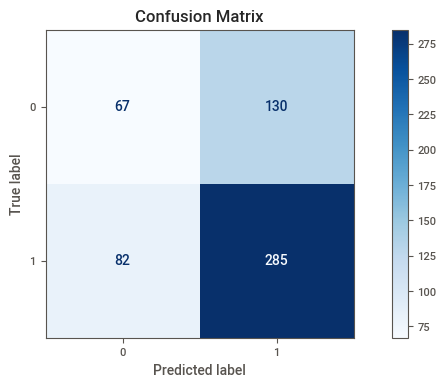

In [293]:
# Confusion Matrix for test data
cm = confusion_matrix(ytest_true, ytest_pred)

# Display the confusion matrix
plt.figure(figsize=(3, 3)) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)  # Turn off the grid 
plt.title('Confusion Matrix')
plt.show()

In [294]:
# Generate classification report
report = classification_report(ytest_true, ytest_pred, target_names=['Class 0', 'Class 1'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.45      0.34      0.39       197
     Class 1       0.69      0.78      0.73       367

    accuracy                           0.62       564
   macro avg       0.57      0.56      0.56       564
weighted avg       0.60      0.62      0.61       564



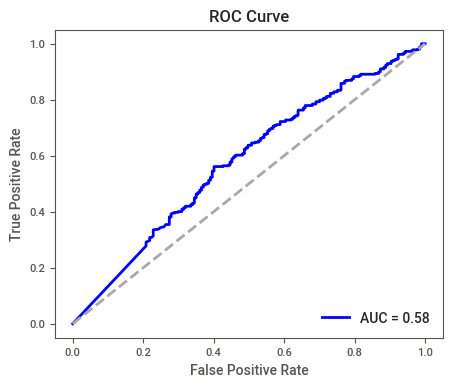

In [295]:
# Compute ROC curve and AUC for test data
fpr, tpr, thresholds = roc_curve(ytest_true, ytest_pred_prob)
roc_auc = roc_auc_score(ytest_true, ytest_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(5, 4)) 
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Model Performance Comparison

In [296]:
# Initialize lists to store accuracies and other metrics for both models
model_names = []
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []
aucs = []
true_positives = []
false_positives = []
true_negatives = []
false_negatives = []

# Define models
models = {
    'Base Model': base_model,
    'Tuned Model': best_model
}

# Loop through each model to get predictions and accuracies
for model_name, model in models.items():
    model_names.append(model_name)
    
    # For training accuracy
    ytrain_pred = model.predict(g_train)
    ytrain_pred = np.where(ytrain_pred > 0.5, 1, 0)  # Convert probabilities to class labels
    ytrain_true = ytrain[seqlen:]  # Adjust ytrain to match the length of ytrain_pred
    acc_train = accuracy_score(ytrain_true, ytrain_pred)
    train_accuracies.append(acc_train)
    
    # For test accuracy
    ytest_pred = np.where(model.predict(g_test, verbose=False) > 0.5, 1, 0)  # Convert probabilities to class labels
    ytest_true = ytest[seqlen:]  # Adjust ytest to match the length of ytest_pred
    acc_test = accuracy_score(ytest_true, ytest_pred)
    test_accuracies.append(acc_test)
    
    # Compute precision, recall, f1-score
    precision, recall, f1, _ = precision_recall_fscore_support(ytest_true, ytest_pred, average='binary')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Compute AUC
    y_proba = model.predict(g_test).flatten()
    roc_auc = roc_auc_score(ytest_true, y_proba)
    aucs.append(roc_auc)
    
    # Compute confusion matrix
    cm = confusion_matrix(ytest_true, ytest_pred)
    tn, fp, fn, tp = cm.ravel()
    true_negatives.append(tn)
    false_positives.append(fp)
    false_negatives.append(fn)
    true_positives.append(tp)
    
# Create a dictionary with the results
results_dict = {
    'Model': model_names,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores,
    'AUC': aucs,
    'True Positives': true_positives,
    'False Positives': false_positives,
    'True Negatives': true_negatives,
    'False Negatives': false_negatives
}

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results_dict)

In [297]:
results_df.round(4).T

,0,1
Model,Base Model,Tuned Model
Train Accuracy,0.6409,0.6392
Test Accuracy,0.6312,0.6241
Precision,0.6695,0.6867
Recall,0.8556,0.7766
F1-Score,0.7512,0.7289
AUC,0.569,0.5793
True Positives,314,285
False Positives,155,130
True Negatives,42,67


The comparison between the base and tuned models highlights a shift in performance focus after tuning. The tuned model achieved higher precision, which reduced the number of false positives and improved its ability to make more accurate positive predictions. However, this gain in precision came with a reduction in recall, meaning the tuned model missed more actual positive cases than the base model. As a result, the F1-score, which balances precision and recall, was lower for the tuned model. Although the overall accuracy and AUC remained relatively similar, the tuned model favored precision over recall, making it more conservative in predicting positive outcomes. This trade-off illustrates the model shift towards avoiding false positives at the expense of identifying all positive instances.

In [298]:
# Define the model path within this directory
tuned_model_path = results_path / 'tuned_model.h5'

# Load the model from the specified path
tuned_model = load_model(tuned_model_path)
tuned_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 15, 20)            4480      
_________________________________________________________________
Dropout1 (Dropout)           (None, 15, 20)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 15, 4)             400       
_________________________________________________________________
Dropout2 (Dropout)           (None, 15, 4)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 15, 16)            1344      
_________________________________________________________________
Dropout3 (Dropout)           (None, 15, 16)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 24)                3

### Trading Strategy

The trading strategy is based on applying the model predictions to generate trading signals (***`1`*** and ***`0`***, representing ***`long position`*** and ***`do nothing/stay out of the market`***, respectively). These signals are then used to create a strategy by multiplying the returns by the signals, adjusted for sequence length. Key metrics are also computed to evaluate the effectivenes of the strategy.

In [299]:
# Align the predictions with the test data in df
df_test = df.iloc[-len(Xtest):]  # Adjust based on the length of test set
df_test = df_test.iloc[seqlen:]  # Further adjust for the sequence length
df_test['Signal'] = ytest_pred.flatten()

In [300]:
df_test['Signal'].dropna(inplace=True)
df_test['Strategy'] = df_test['Return'] * df_test['Signal'].shift(1).fillna(0) 
df_test.dropna(subset=['Strategy', 'Return'], inplace=True)

Start date,2023-02-03
End date,2024-08-19
Total months,26
,Backtest
Annual return,71.278%
Cumulative returns,233.462%
Annual volatility,33.028%
Sharpe ratio,1.79
Calmar ratio,3.55
Stability,0.90
Max drawdown,-20.058%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,20.06,2023-07-13,2023-09-11,2023-10-23,73
1,18.70,2023-02-20,2023-03-10,2023-03-16,19
2,17.59,2023-04-14,2023-06-14,2023-06-23,51
3,15.89,2024-01-08,2024-01-22,2024-02-09,25
4,7.67,2023-02-03,2023-02-10,2023-02-15,9


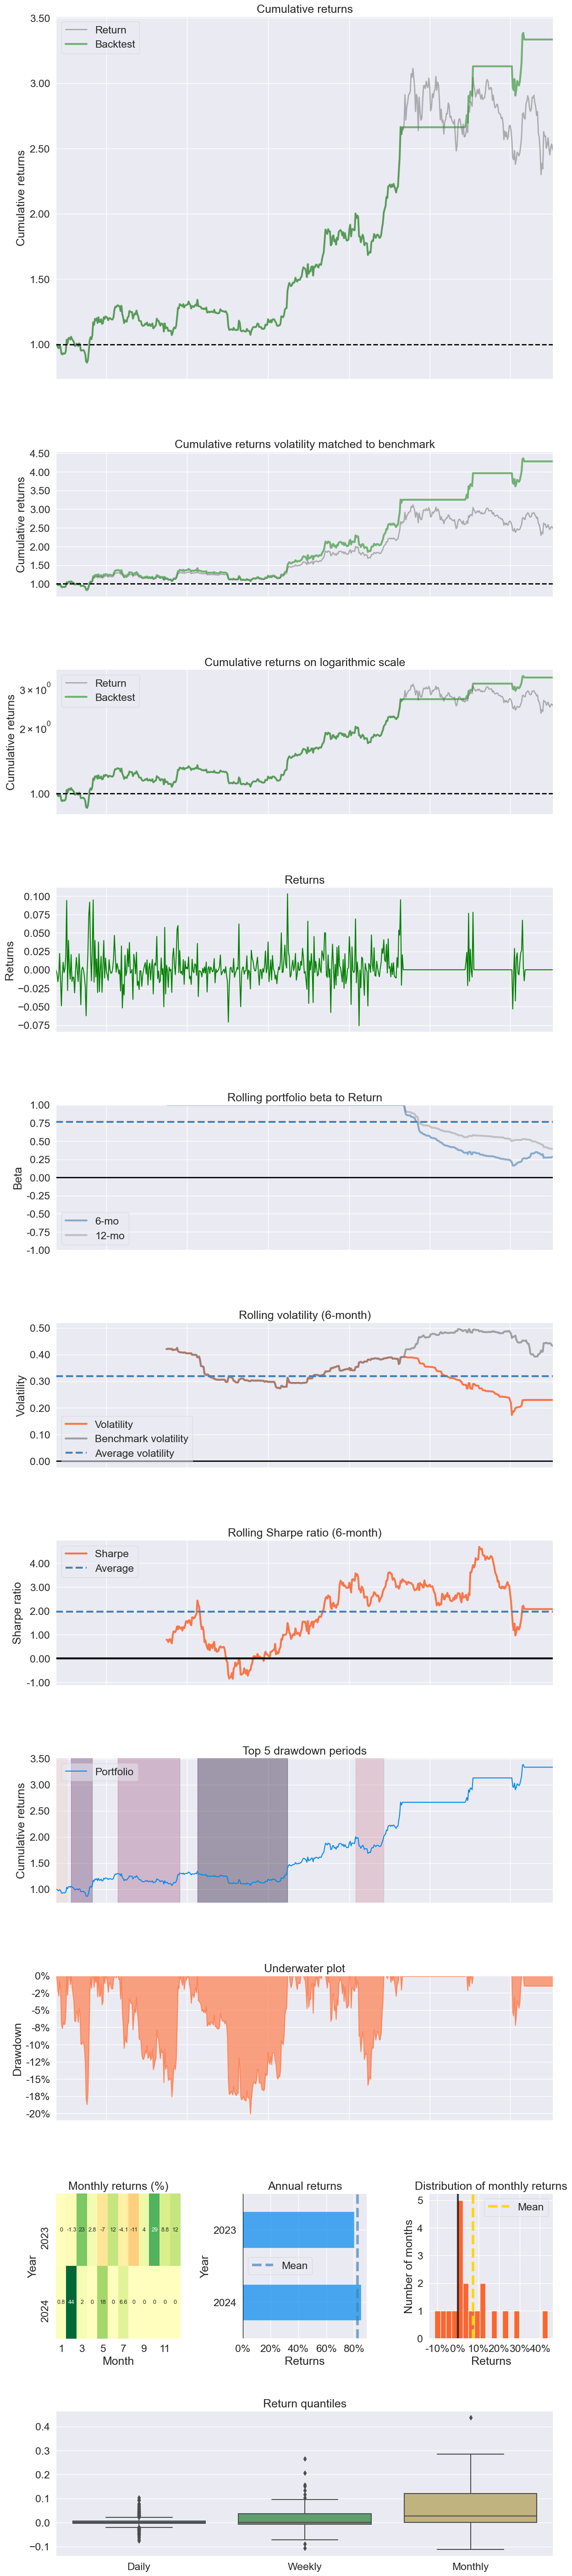

In [301]:
# Localize index for pyfolio
df_test.index = df_test.index.tz_localize('utc')
pf.create_returns_tear_sheet(df_test['Strategy'],benchmark_rets=df_test['Return'])

#### Calculate Financial Metrics

In [305]:
# Function to calculate Maximum Drawdown
def max_drawdown(return_series):
    cum_returns = (1 + return_series).cumprod()
    peak = cum_returns.expanding(min_periods=1).max()
    drawdown = ((cum_returns / peak) - 1) * 100
    return drawdown.min()

# Calculate Total Return
cumulative_return_strategy = ((df_test['Strategy'] + 1).prod() - 1) * 100 
cumulative_return = ((df_test['Return'] + 1).prod() - 1) * 100

# Calculate Annualized Sharpe Ratio (Assuming risk-free rate = 0 and 365 trading days for Bitcoin)
annualized_sharpe_ratio_strategy = (df_test['Strategy'].mean() / df_test['Strategy'].std()) * np.sqrt(365)
annualized_sharpe_ratio_return = (df_test['Return'].mean() / df_test['Return'].std()) * np.sqrt(365)

# Calculate Maximum Drawdown
max_drawdown_strategy = max_drawdown(df_test['Strategy'])
max_drawdown_return = max_drawdown(df_test['Return'])

# Create a DataFrame for the results
metrics = pd.DataFrame({
    'Metric': ['Cumulative Return %', 'Sharpe Ratio', 'Max Drawdown %'],
    'Strategy': [cumulative_return_strategy, annualized_sharpe_ratio_strategy, max_drawdown_strategy],
    'Benchmark': [cumulative_return, annualized_sharpe_ratio_return, max_drawdown_return]
})

# Print the DataFrame
metrics.round(4)

,Metric,Strategy,Benchmark
0,Cumulative Return %,233.4622,152.9530
1,Sharpe Ratio,2.1585,1.4660
2,Max Drawdown %,-20.0578,-26.1236


Below is a summary of the steps taken throughout this project, highlighting the key techniques and methods applied at each stage, along with their specific roles in the analysis.

| Step                         | Technique                              | Description                                                                                                                                                  |
|------------------------------|----------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1. Data Collection            | Yahoo Finance API                      | Gathering historical Bitcoin prices from Yahoo Finance.                                                                                                       |
| 2. Data Cleaning/Preparation  | DayTransformer                         | Custom transformer for preprocessing dates and engineering features related to the days of the week.                                                          |
|                               | RobustScaler                           | Standardizing feature values to handle outliers and ensure consistent model performance.                                                                      |
|                               | Class Imbalance Handling               | Computing class weights to address class imbalance in the dataset.                                                                                            |
|                               | Train-Test Split                       | Splitting the dataset into training, validation, and testing subsets to evaluate model performance.                                                           |
|                               | Label Definition                       | Creating the `dir` column to indicate trading signals (binary classification).                                                                                |
|                               | Pandas TA                              | Technical analysis library for generating a wide range of technical indicators for trading data.                                                              |
| 3. Exploratory Data Analysis  | Sweetviz                               | Generating an exploratory data analysis report to find patterns and relationships in the data.                                                                 |
|                               | Box Plots                              | Visualizing the distribution of data and identifying outliers in features.                                                                                    |
|                               | Scatter Plots                          | Analyzing relationships and correlations between pairs of features.                                                                                           |
| 4. Feature Engineering        | Boruta                                 | An ensemble-based method for robust feature selection in high-dimensional datasets.                                                                           |
|                               | Correlation Analysis                   | Identifying and removing highly correlated features to handle multicollinearity.                                                                              |
|                               | Mutual Information                     | Quantifying dependencies between variables to select the most relevant features for the model.                                                                |
|                               | K-means Clustering                     | Grouping similar patterns in the data and refining features by reducing dimensionality. Clarifies patterns in the data.                                        |
| 5. Model Building and Training| LSTM Network Architecture              | Applying LSTM to model time-series data and capture temporal dependencies.                                                                                    |
|                               | GRU Network Architecture               | Implementing GRU models to capture temporal patterns with a more simplified architecture compared to LSTMs.                                                    |
|                               | Hybrid Models                          | Combining LSTM and convolutional layers to leverage both spatial and temporal dependencies in the data.                                                       |
|                               | TimeseriesGenerator                    | Structuring the data for all models in time-series forecasting.                                                                                               |
| 6. Hyperparameter Tuning      | Optuna                                 | Systematically optimizing hyperparameters using Bayesian optimization techniques to enhance model performance.                                                 |
|                               | TensorBoard                            | Monitoring hyperparameter tuning process and visualizing performance metrics.                                                                                 |
| 7. Model Evaluation           | Evaluation Metrics                     | Using accuracy, precision, recall, F1-score, and AUC to assess model performance.                                                                             |
|                               | Confusion Matrix                       | Analyzing the model classification performance by examining true positives, false positives, true negatives, and false negatives.                             |
|                               | ROC Curve and AUC Score                | Graphically representing the diagnostic ability of the binary classifier and calculating the area under the curve.                                             |
|                               | Backtesting                            | Evaluating the trading strategy using Pyfolio and calculating financial metrics.                                                                              |



## Conclusion

This project is divided into several key stages: data collection and pre-processing, feature engineering, and the development of a Bitcoin price prediction model using deep learning architectures. We gathered 8 years of Bitcoin market data from Yahoo Finance, ensuring that the dataset was properly structured and cleaned to meet the demands of time-series forecasting.

During the feature engineering phase, a variety of technical indicators were incorporated, and advanced selection techniques such as Boruta, correlation analysis, mutual information, and K-means clustering were employed to refine the feature set. The use of the RobustScaler for data normalization helped mitigate the impact of outliers, which is critical for maintaining consistent model performance.

Multiple models, including LSTM, GRU, and hybrid architectures with convolutional layers, were evaluated for their effectiveness in capturing the temporal dependencies of Bitcoin prices. A 4-Layer LSTM model was chosen for its ability to retain long-term memory in sequential data, making them particularly suited to the volatile Bitcoin market. The model was further optimized using Optuna, which systematically explored the hyperparameter space to enhance performance, while TensorBoard enabled real-time monitoring and tracking during training and tuning.

Through backtesting, we validated the performance of the model against historical data, assessing its potential in a real-world trading environment. Despite the improvements made through feature engineering and hyperparameter tuning, the inherent volatility of the Bitcoin market presents significant challenges for maintaining predictive accuracy. Model performance was impacted by sharp price movements and periods of unpredictable behavior, which reflects the difficulty of forecasting in such a dynamic market.

Furthermore, while the model demonstrated the ability to predict trends with reasonable accuracy, several practical limitations were acknowledged. These include the potential effects of trading costs, slippage, and the latency of real-time data processing, all of which can affect the model practical effectiveness. The complexity of LSTM models also led to longer training times and increased computational demands. The importance of managing the bias-variance tradeoff cannot be overstated, and further improvements are necessary to ensure the model generalizes effectively to unseen data.

Looking ahead, there are several avenues for further development:
- **Enhanced Feature Engineering**: Future work can explore advanced techniques such as genetic algorithms, sentiment analysis from social media, and blockchain-specific metrics to enrich the feature set.
#
- **Alternative Models**: Investigating other deep learning architectures, such as Transformers or Deep Reinforcement Learning, could provide improvements in capturing complex patterns.
#
- **Real-Time Adaptation**: Developing methods for real-time data processing and model adaptation can enhance the model responsiveness to market changes, improving its practical utility.
#
- **Advanced Hyperparameter Tuning**: Exploring more sophisticated hyperparameter optimization techniques and increasing the search space could further enhance model performance.
#
- **Robust Backtesting**: Continuous backtesting under various market conditions and stress-testing the model against historical market crashes or bull runs will provide deeper insights into its robustness and reliability.
#
- **Integration with Automated Trading Systems**: Implementing the model in a real-world automated trading system, with considerations for latency, execution speed, and integration with trading platforms.
#
- **Risk Management Strategies**: Incorporating advanced risk management techniques, such as dynamic position sizing and stop-loss mechanisms, can help mitigate potential losses and enhance the overall strategy performance.

In summary, while the model demonstrates potential in predicting Bitcoin price movements and informing trading strategies, continuous refinement and adaptation are crucial to maintaining its relevance and effectiveness in the rapidly evolving cryptocurrency market. Ongoing research and development, combined with rigorous backtesting and real-world application, will be key to unlocking its full potential.

### References

1. CQF Elective Workshop Advanced Machine Learning I.

2. [Keras API](https://keras.io)

3. [TensorFlow API](https://www.tensorflow.org)

4. [Optuna API](https://optuna.readthedocs.io/en/stable/)

5. Kimoto, T., Asakawa, K., Yoda, M., & Takeoka, M. (1990). Stock market prediction system with modular neural networks. 

6. Kim, K.-J. (2003). Financial time series forecasting using support vector machines. 
   - URL: [10.1016/S0925-2312(03)00372-2](https://doi.org/10.1016/S0925-2312(03)00372-2)

7. Chong, E., Han, C., & Park, F. C. (2017). Deep learning networks for stock market analysis and prediction: Methodology, data representations, and case studies. 
   - URL: [10.1016/j.eswa.2017.04.030](https://doi.org/10.1016/j.eswa.2017.04.030)

8. Fischer, T., & Krauss, C. (2018). Deep learning with long short-term memory networks for financial market predictions. 
   - URL: [10.1016/j.ejor.2017.11.054](https://doi.org/10.1016/j.ejor.2017.11.054)

9. McNally, S., Roche, J., & Caton, S. (2018). Predicting the price of Bitcoin using machine learning. 
   - URL: [10.1109/PDP2018.2018.00060](https://doi.org/10.1109/PDP2018.2018.00060)

10. Borovykh, A., Bohte, S., & Oosterlee, C. W. (2017). Conditional time series forecasting with convolutional neural networks. 
    - URL: [https://arxiv.org/abs/1703.04691](https://arxiv.org/abs/1703.04691)

11. Wang, J., Liu, J., & She, H. (2020). A hybrid model combining CNN and LSTM for stock market prediction.

12. Bergstra, J., Bardenet, R., Bengio, Y., & Kégl, B. (2011). Algorithms for Hyper-Parameter Optimization. 
- URL: https://proceedings.neurips.cc/paper/2011/file/86e8f7ab32cfd12577bc2619bc635690-Paper.pdf

13. Kursa, M. B., & Rudnicki, W. R. (2010). Feature Selection with the Boruta Package. 
    - URL: [https://www.jstatsoft.org/article/view/v036i11](https://www.jstatsoft.org/article/view/v036i11)

14. Benesty, J., Chen, J., Huang, Y., & Cohen, I. (2009). Pearson Correlation Coefficient. Springer.

15. Cover, T. M., & Thomas, J. A. (2006). Elements of Information Theory. John Wiley & Sons.

16. MacQueen, J. (1967). Some Methods for classification and Analysis of Multivariate Observations. 
    - URL: [https://projecteuclid.org/euclid.bsmsp/1200512992](https://projecteuclid.org/euclid.bsmsp/1200512992)
    
17. Snoek, J., Larochelle, H., & Adams, R. P. (2012). Practical Bayesian optimization of machine learning algorithms.
    - URL: [https://arxiv.org/abs/1206.2944](https://arxiv.org/abs/1206.2944)
    
18. Explaining Hyperparameter Optimization via Partial Dependence Plots. (2021). arXiv preprint.
    - URL: [https://arxiv.org/abs/2111.04820](https://arxiv.org/abs/2111.04820)





  
